# Employee Performance Analysis


This project is about to predict the performance of employee from various aspect based on the given dataset and provide best recommendation in the improvement.

# Importing the libraries

In [254]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading the data

In [611]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [612]:
#Displaying top 20 list of data
data.head(20)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
5,E1001011,27,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,...,3,9,4,2,9,7,1,7,No,4
6,E1001016,50,Male,Marketing,Married,Sales,Sales Representative,Travel_Rarely,8,4,...,4,4,2,3,2,2,2,2,No,3
7,E1001019,28,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,2,...,4,10,4,3,7,7,3,7,Yes,3
8,E1001020,36,Female,Life Sciences,Married,Development,Developer,Non-Travel,8,3,...,1,10,2,3,8,7,0,5,No,3
9,E1001021,38,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,3,...,4,10,4,4,1,0,0,0,No,3


In [613]:
# Displaying data types of each features/columns/variables/dimensions using info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [17]:
# Displaying number of columns and rows using "shape" property
data.shape

(1200, 28)

In [18]:
# Displaying list of columns using "columns" property
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [19]:
# Dispalying the stastistical information using "describe" method
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [167]:
#displaying top five 5 rows from the dataset
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,0,3


In [614]:
# Extracting the numerical and categorical data
categorical_features = []
numerical_features = []

for column in data.columns:
    if data[column].dtypes == object and len(data[column].unique())<=50:
        categorical_features.append(column)
    else:
        numerical_features.append(column)

In [209]:
categorical_features

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

In [210]:
numerical_features

['EmpNumber',
 'Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

# Exploratory Data Analysis

### Univariate analysis of categorical features

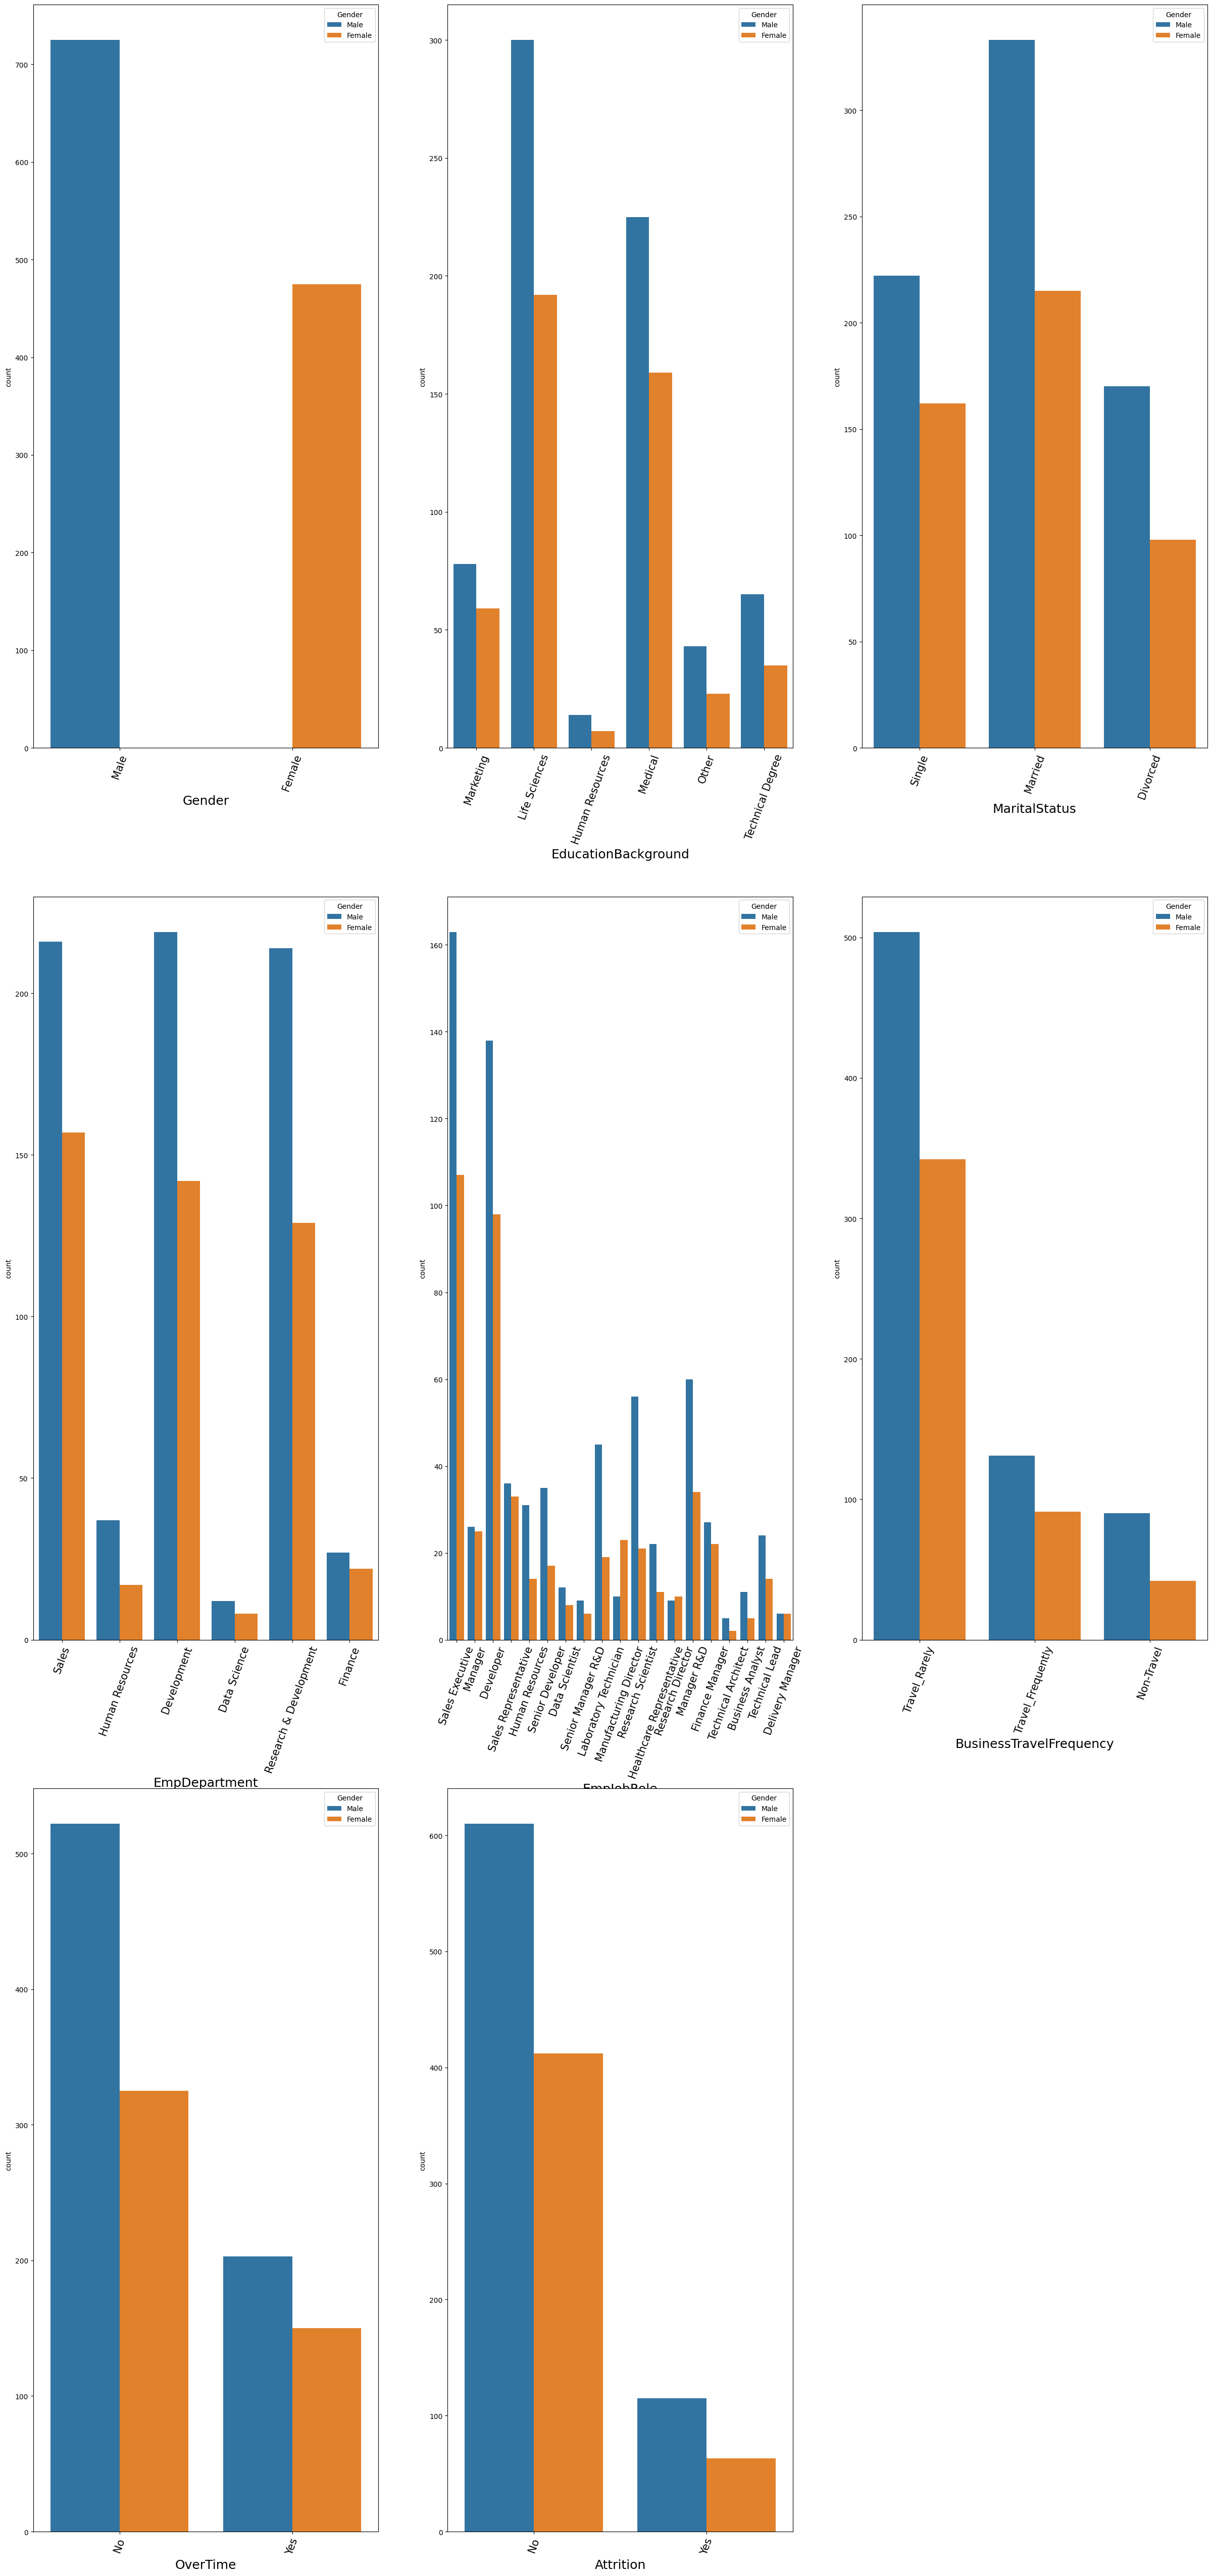

In [63]:
plt.figure(figsize=(30,65))
count_plot = 1
for feature in categorical_features:
    if count_plot <=12:
        ax = plt.subplot(3,3,count_plot)
        sns.countplot(x=data[feature],hue=data['Gender'])
        plt.xlabel(feature,fontsize=18,)
        plt.xticks(rotation = 70,fontsize=15)
    count_plot +=1

From Above diagrams it can be observed from the given dataset:
Gender: In genders, Male empolyees are higher in number.

EducationBackground: In LifeScience and Medical, Male and Female are higer in number. However, in that, Male employees are 
                     more.In HumanResource, very few Male and Female are working as employee. 
                     
MaritalStatus: In this, married are working more as compared to other.

EmpDepartment: In Development department, both Male and Female are working which are higher in quantity of all employees whereas DataScience has very low in number.

BusinessTravelFequency: Male and Female who travels rarely are drastically higer in number.

OverTime: Male and Female who do not prefer working overtime are more than who prefer overtime.

Attrition: The Male and Female who do not want to woker longer in the same company are very less in number among all employees. 


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Manager'),
  Text(2, 0, 'Developer'),
  Text(3, 0, 'Sales Representative'),
  Text(4, 0, 'Human Resources'),
  Text(5, 0, 'Senior Developer'),
  Text(6, 0, 'Data Scientist'),
  Text(7, 0, 'Senior Manager R&D'),
  Text(8, 0, 'Laboratory Technician'),
  Text(9, 0, 'Manufacturing Director'),
  Text(10, 0, 'Research Scientist'),
  Text(11, 0, 'Healthcare Representative'),
  Text(12, 0, 'Research Director'),
  Text(13, 0, 'Manager R&D'),
  Text(14, 0, 'Finance Manager'),
  Text(15, 0, 'Technical Architect'),
  Text(16, 0, 'Business Analyst'),
  Text(17, 0, 'Technical Lead'),
  Text(18, 0, 'Delivery Manager')])

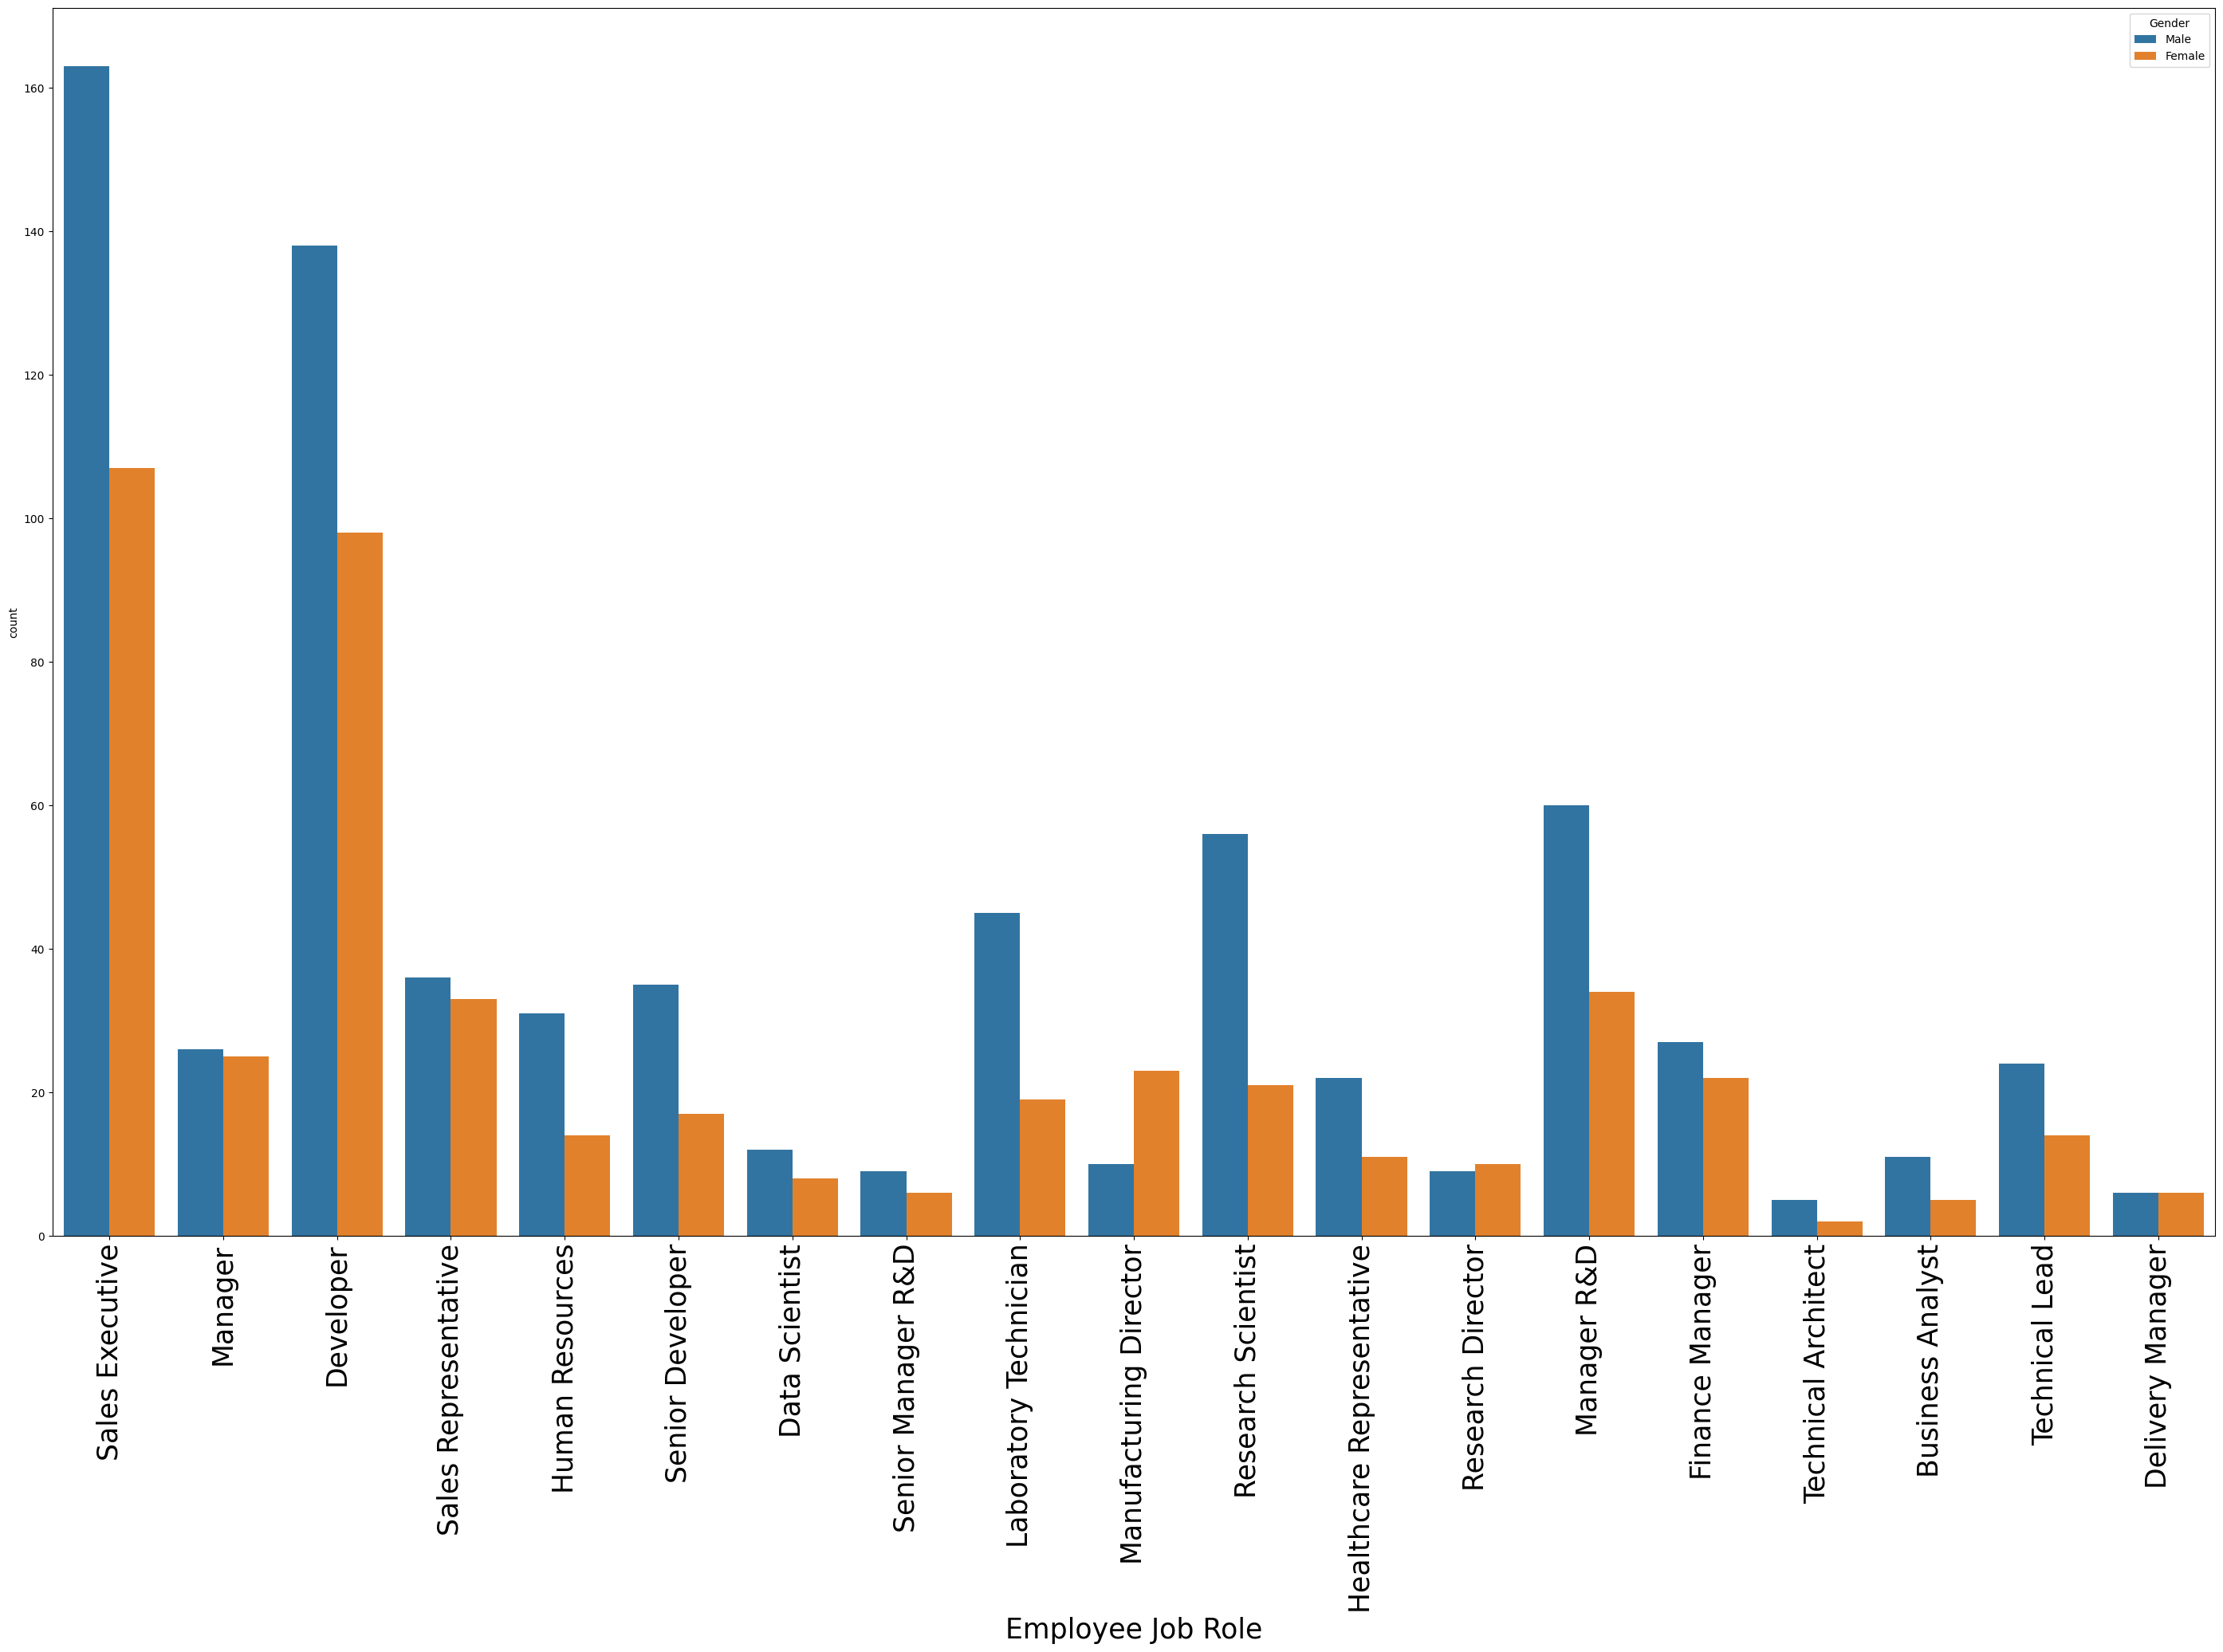

In [62]:
# In above plot EmpJobRole does not show clear label text so creating single plot for it.
plt.figure(figsize=(35,20))
sns.countplot(x=data['EmpJobRole'],hue=data['Gender'])
plt.xlabel("Employee Job Role",fontsize=25)
plt.xticks(rotation=90,fontsize=25)

From above diagram EmpJobRole, both Male and Female employee who work as Sales Executive and Developer are huge in number. Likewise, as TechnicalArchitect very little people are working in terms of Male and Female.

### Univariate analysis of numerical features

In [571]:
#Removing EmpNumber 
numerical_features.remove('EmpNumber')

In [168]:
# import numpy as np
# import matplotlib.pyplot as plt
# _, axes = plt.subplots(6,5, figsize=(15, 15))
# malignant = breast_cancer.data[breast_cancer.target==0]
# benign = breast_cancer.data[breast_cancer.target==1]
# ax = axes.ravel()                     # flatten the 2D array
# for i in range(30):                   # for each of the 30 features
#     bins = 40
#     #---plot histogram for each feature---
#     ax[i].hist(malignant[:,i], bins=bins, color='r', alpha=.5)
#     ax[i].hist(benign[:,i], bins=bins, color='b', alpha=0.3)
#     #---set the title---
#     ax[i].set_title(breast_cancer.feature_names[i], fontsize=12)    
#     #---display the legend---
#     ax[i].legend(['malignant','benign'], loc='best', fontsize=8)
    
# plt.tight_layout()
# plt.show()

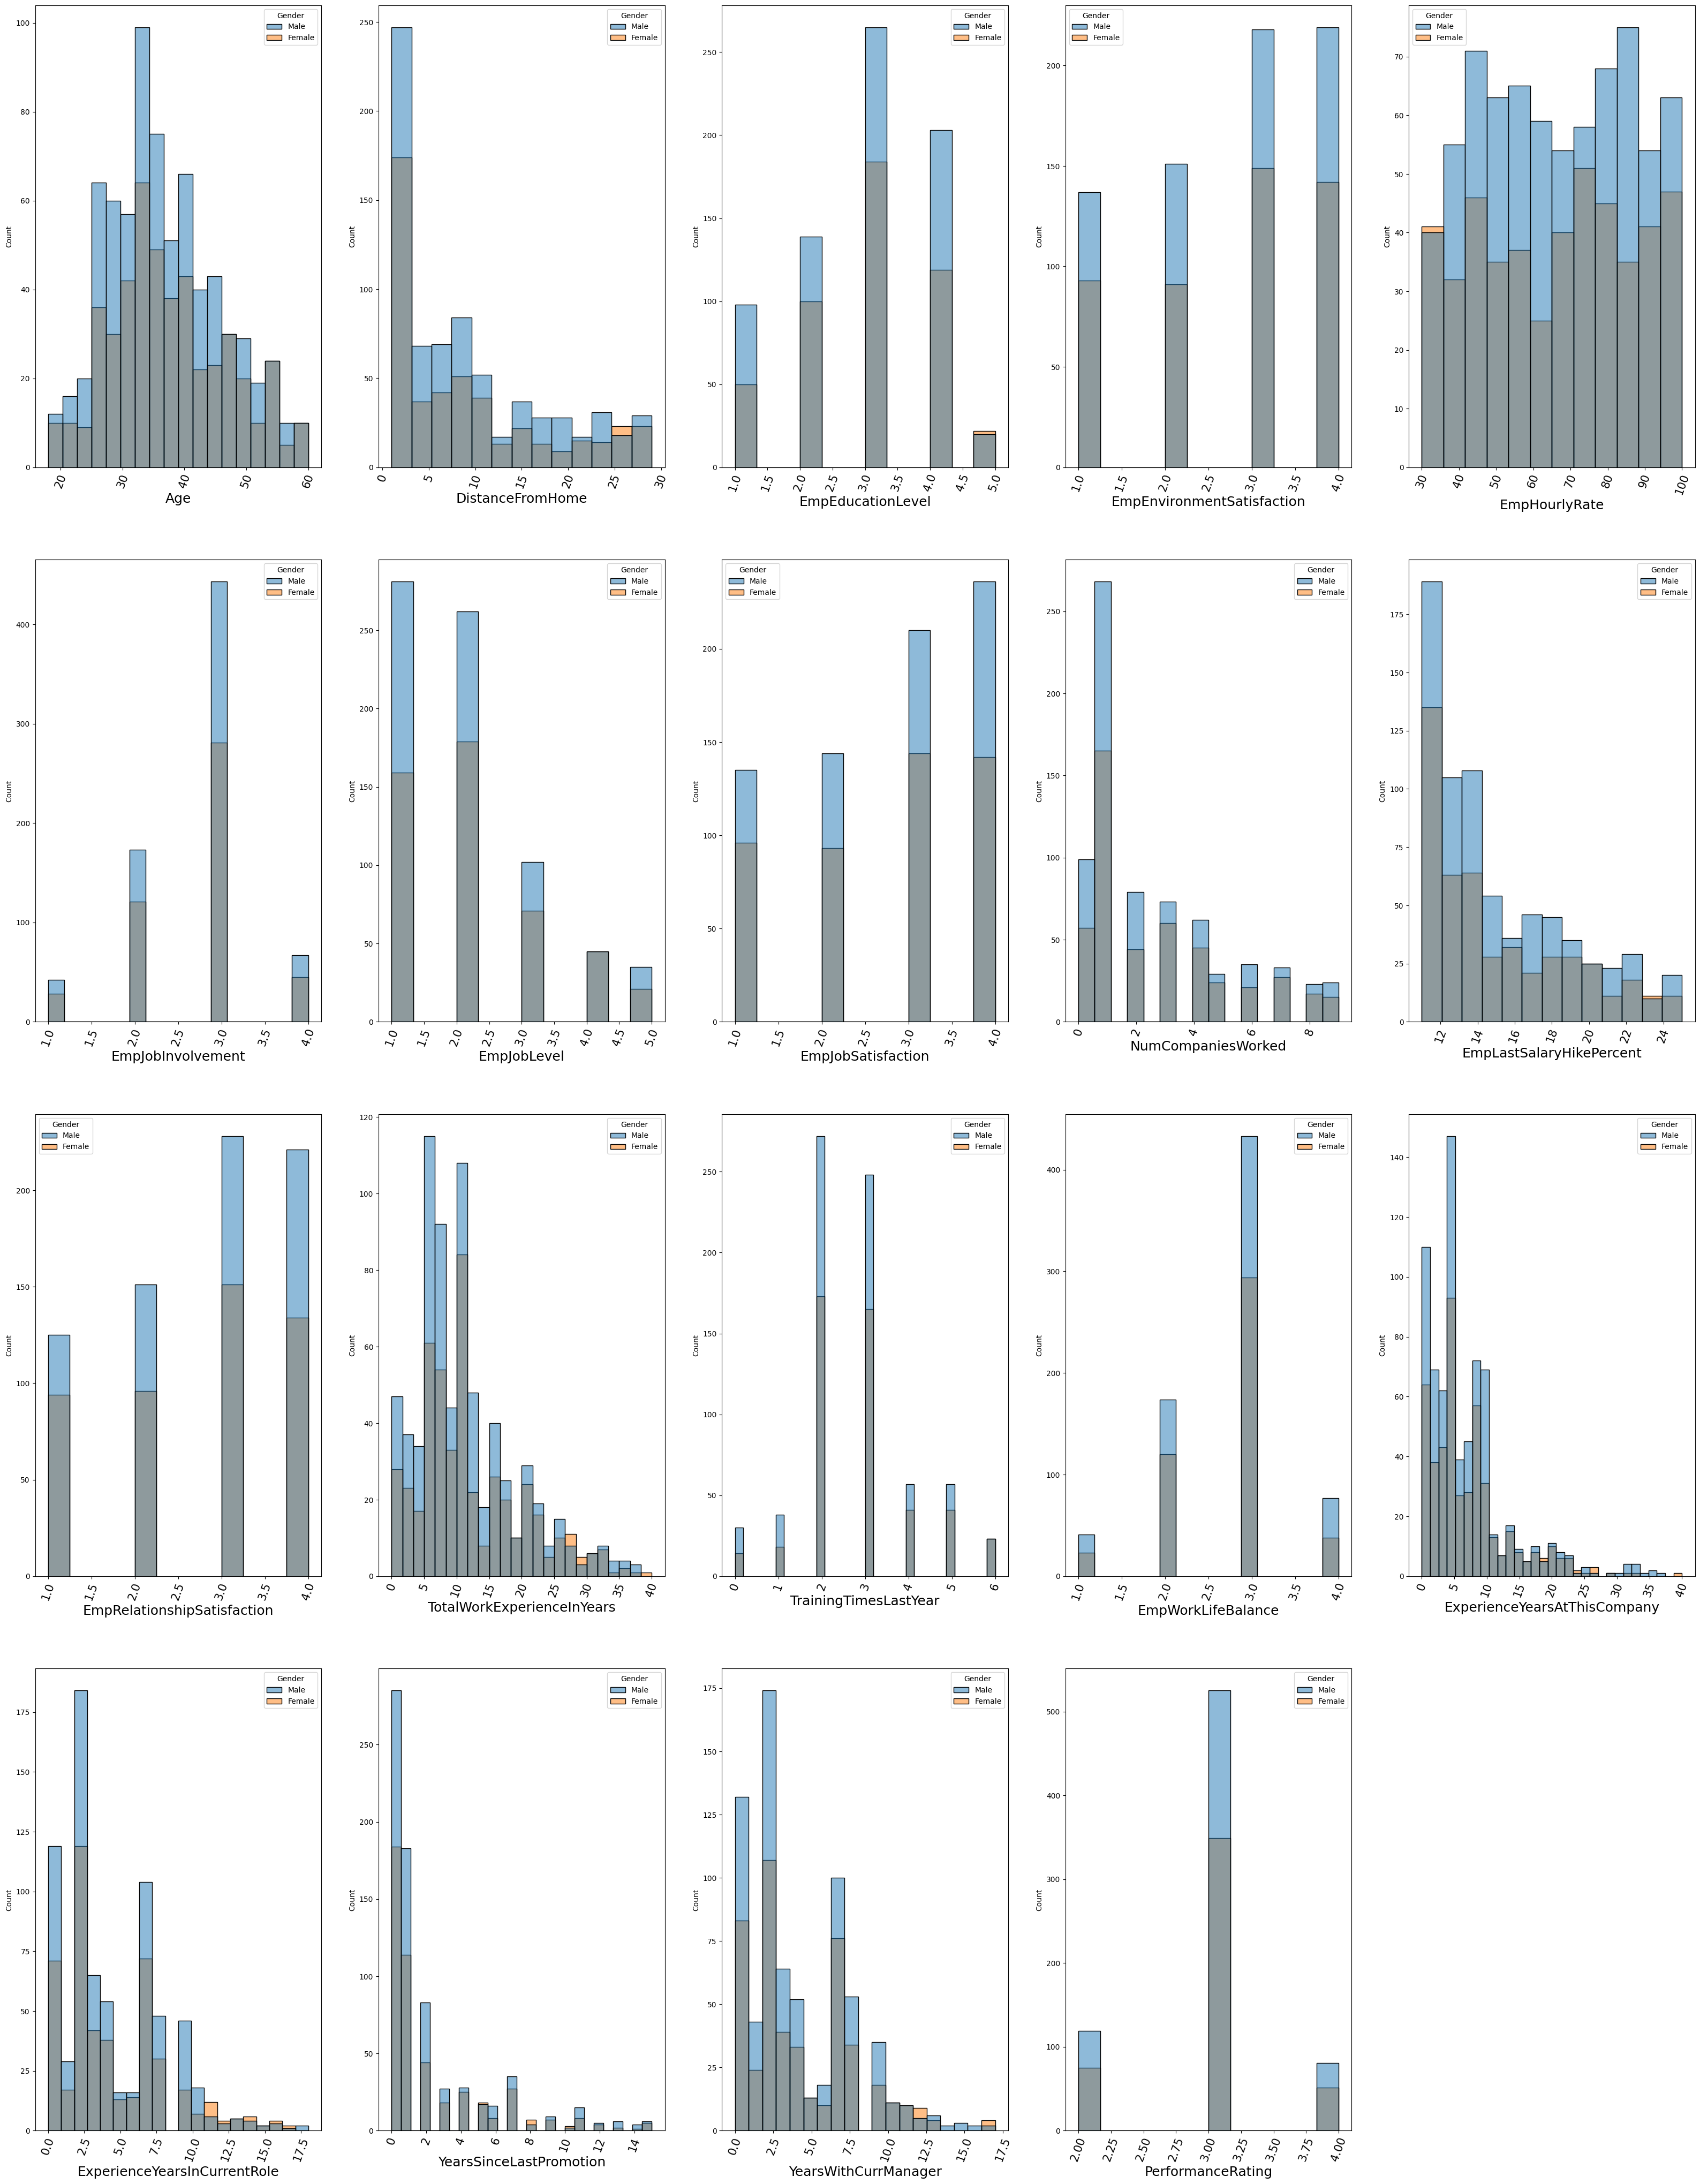

In [77]:
plt.figure(figsize=(40,65))
count_plot = 1

for feature in numerical_features:
    if count_plot <=25:
        ax = plt.subplot(5,5,count_plot)
        sns.histplot(x = data[feature].dropna(axis=0),hue=data['Gender'])
        plt.xlabel(feature,fontsize=18,)
        plt.xticks(rotation = 70,fontsize=15)
    count_plot +=1

# Bivariate analysis

### Bivariate analysis of categorical features with respect to the Attrition

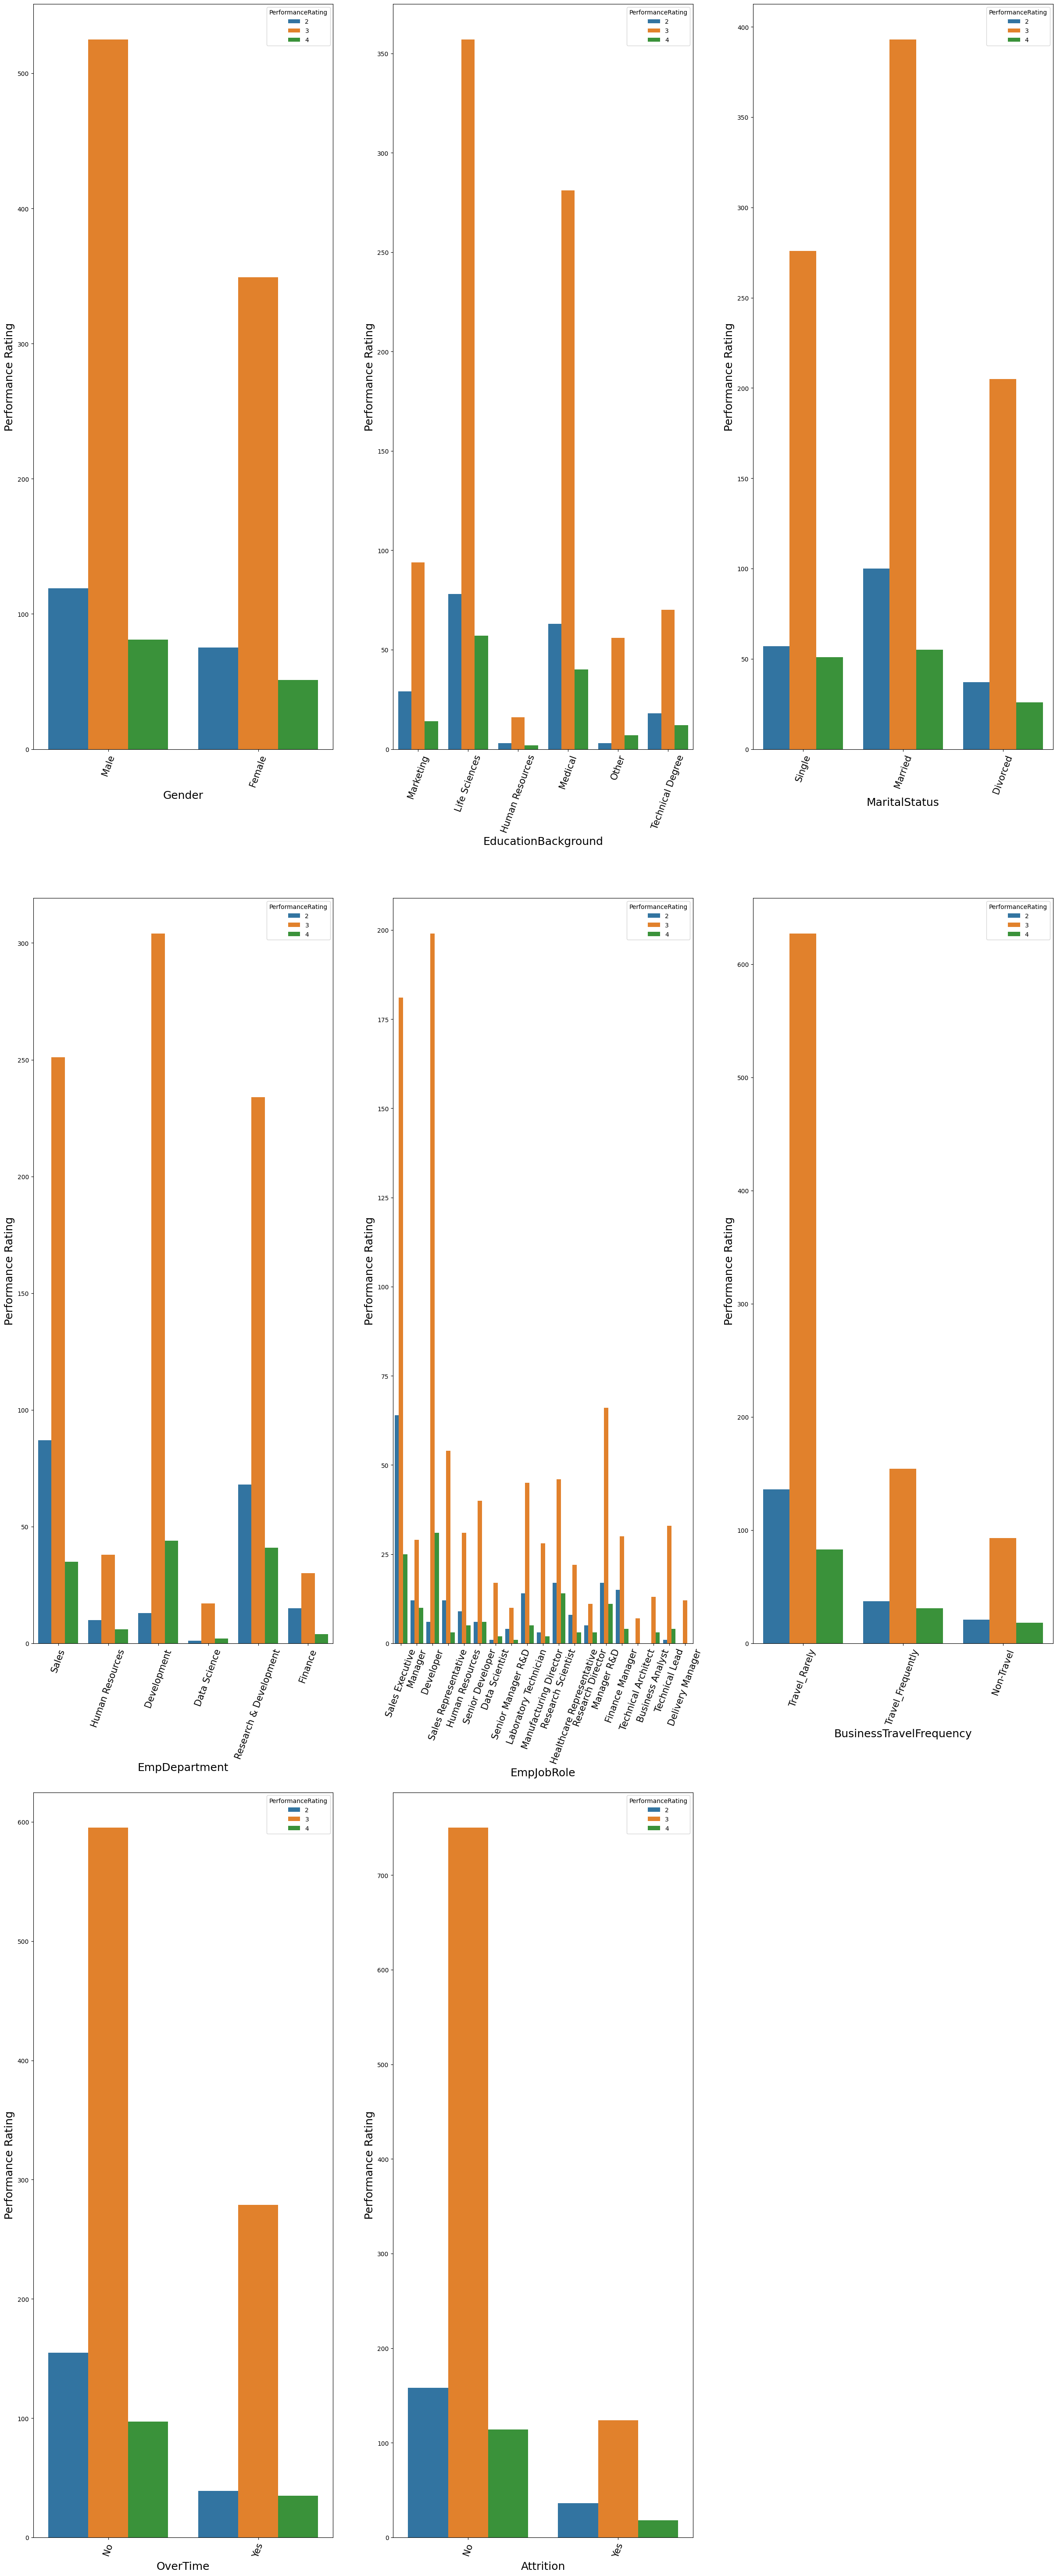

In [615]:
plt.figure(figsize=(30,75))
count_plot = 1
for feature in categorical_features:
    if count_plot <=12:
        ax = plt.subplot(3,3,count_plot)
        sns.countplot(x=data[feature],hue=data['PerformanceRating'])
        plt.xlabel(feature,fontsize=18,)
        plt.ylabel('Performance Rating', fontsize =18)
        plt.xticks(rotation = 70,fontsize=15)
    count_plot +=1

### Bivariate analysis of numerical features with respect to the Attrition

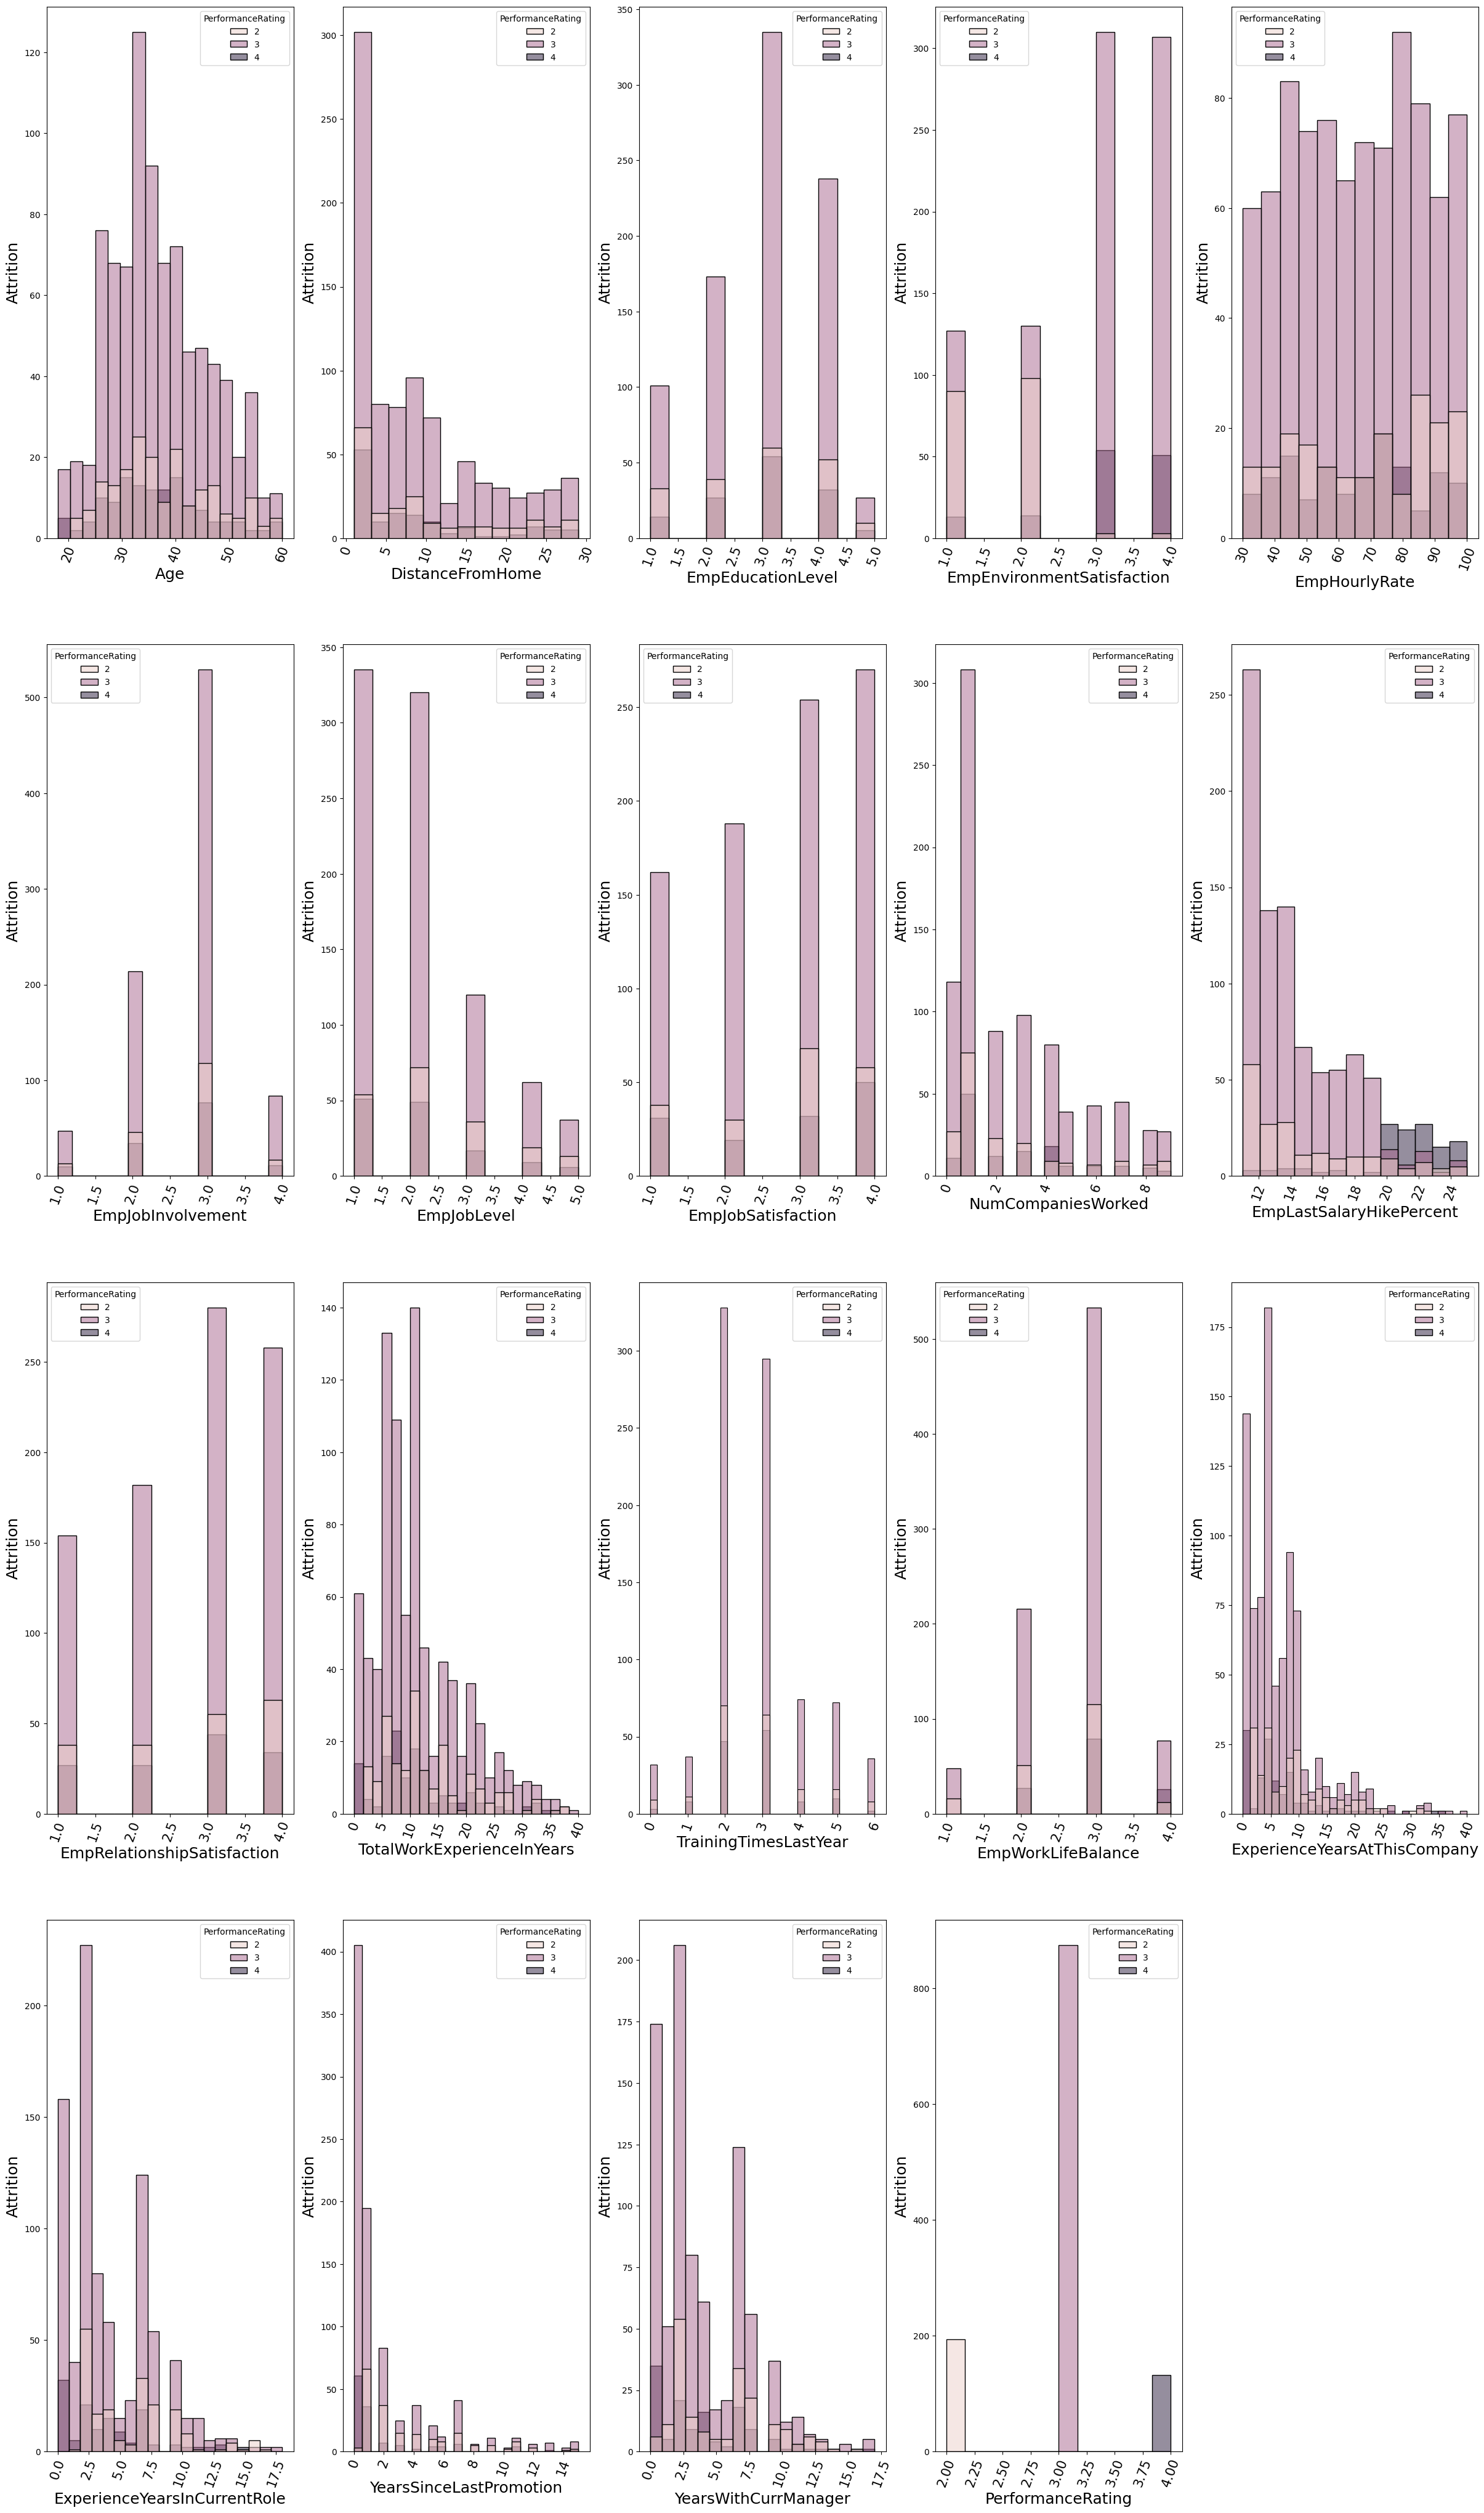

In [572]:
plt.figure(figsize=(30,65))
count_plot = 1
for feature in numerical_features:
    if count_plot <=25:
        ax = plt.subplot(5,5,count_plot)
        sns.histplot(x=data[feature],hue=data['PerformanceRating'])
        plt.xlabel(feature,fontsize=18,)
        plt.ylabel('Attrition', fontsize =18)
        plt.xticks(rotation = 70,fontsize=15)
    count_plot +=1

# Multivariate Analysis

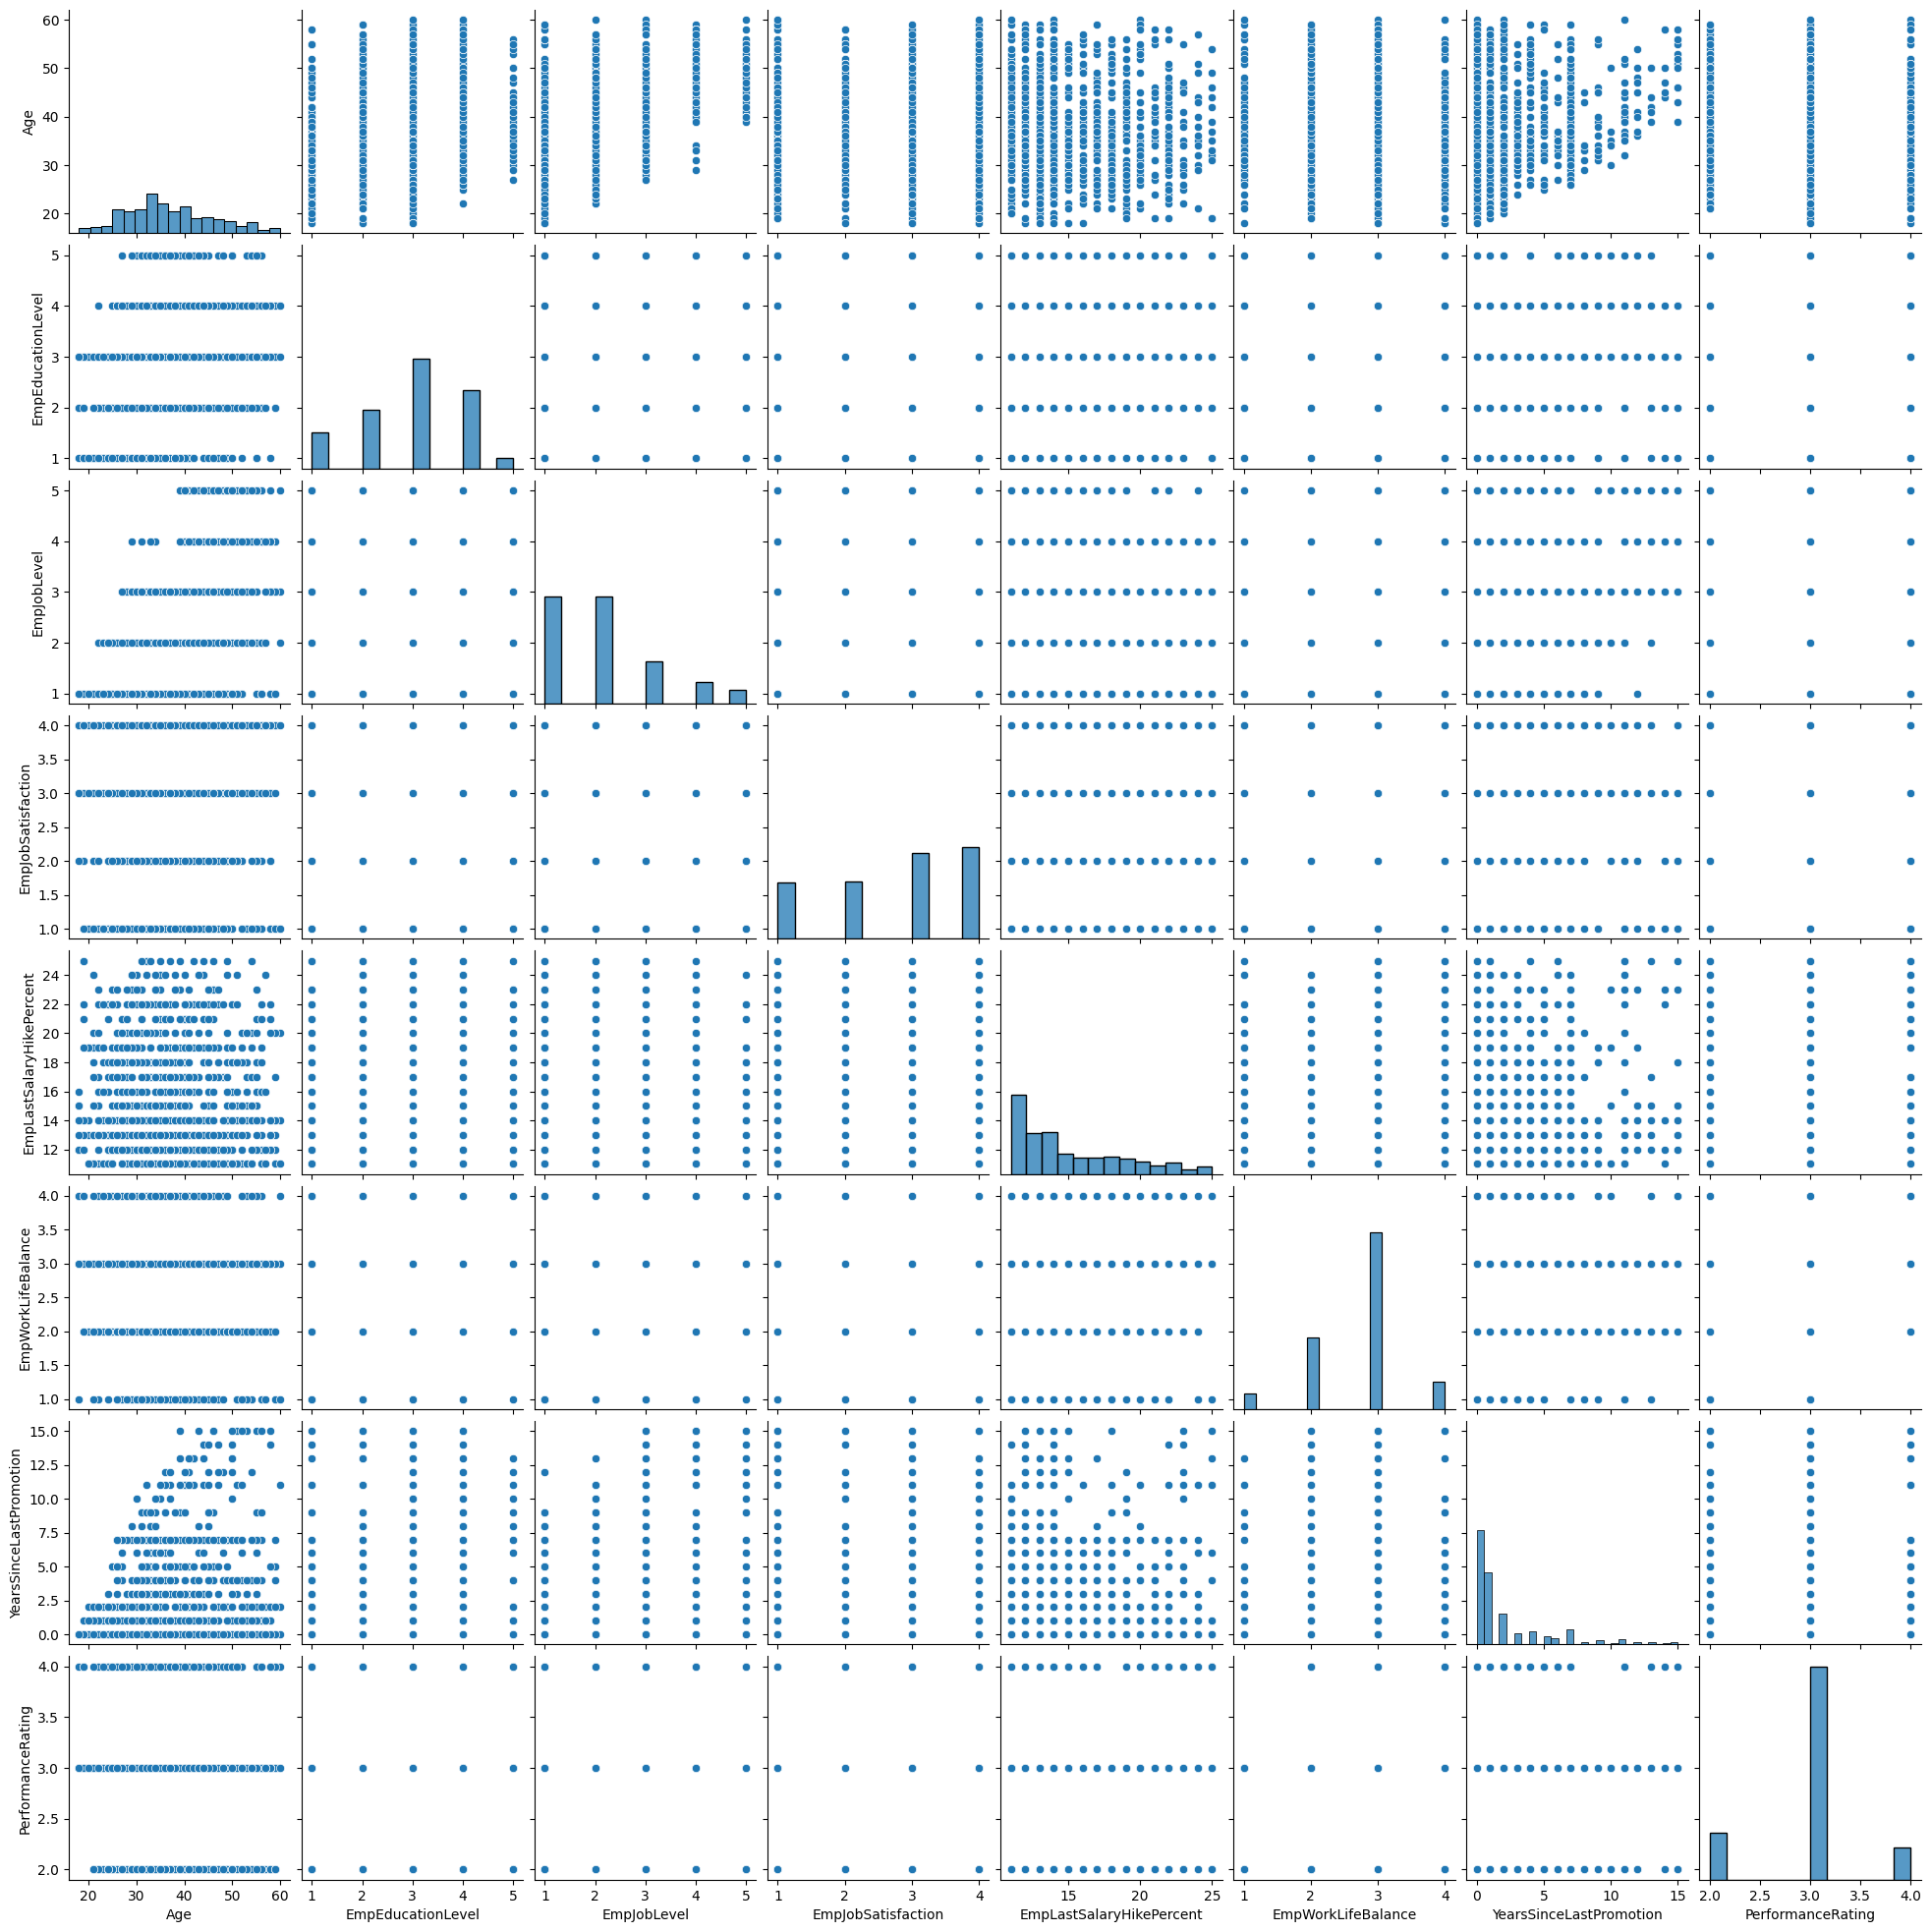

In [108]:
numerical_pairplot = data[['Age','EmpEducationLevel','EmpJobLevel','EmpJobSatisfaction','EmpLastSalaryHikePercent',
                           'EmpWorkLifeBalance','YearsSinceLastPromotion','PerformanceRating']]
sns.pairplot(numerical_pairplot)
# # data_cat

# Data Preprocessing and Feature Engineering

In [475]:
# Checking for missing data
data.isnull().sum()# no missing values

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [476]:
# converting categorical data into numerical data because algorithms read numerical values for computing and prediction. Checking
# categorical data.
data[categorical_features]

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
...,...,...,...,...,...,...,...,...
1195,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No
1196,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No
1197,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No
1198,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,No,No


In [573]:
#1. converting Attrition feature which is a response or predicting variable. Though there are many techniques such as OneHotEncoder,
# pandas.get_dummies,LabelEncoder or manual encoding using map() function. Here I am using manual encoding using map() function.


data.Attrition = data.Attrition.map({'No':0,'Yes':1})

In [478]:
# Checking unique values of Attrittion feature
data.Attrition.unique()

array([0, 1], dtype=int64)

In [574]:
# Convertering Gender feature. Here I am using get_dummies()

# from sklearn.preprocessing import OneHotEncoder
# onehotencoder = OneHotEncoder()
# datatest = data
# data_test = datatest[['Gender']]
# datatest.Gender = onehotencoder.fit_transform(datatest[['Gender']])

data.Gender = pd.get_dummies(data.Gender,drop_first=True)


In [576]:
# Checking unique values of Gender feature
data.Gender.value_counts()

1    725
0    475
Name: Gender, dtype: int64

In [577]:
#Checking performace rating
data.PerformanceRating.value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

In [578]:
# Checking unique values of EducationBackground feature
data.EducationBackground.value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

In [579]:
#converting EducationBackground feature into numerical. Giving more weightage according higher number in descending order. 
data.EducationBackground=data.EducationBackground.map({'Life Sciences':5,'Medical':4,'Marketing':3,'Technical Degree':2,'Other':1,'Human Resources':0 })
   
 

In [580]:
# Checking unique values of EducationBackground feature
data.MaritalStatus.value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

In [581]:
# Converting EducationBackground feature into numerical.I am using LabelEncoder. 

labelEncode = LabelEncoder()

data.MaritalStatus = labelEncode.fit_transform(data.MaritalStatus)

In [582]:
# Checking unique values of EmpDepartment feature
data.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [583]:
#converting EmpDepartment feature into numerical. Giving more weightage according higher number in descending order. 

data.EmpDepartment=data.EmpDepartment.map({'Sales':5,'Development':4,'Research & Development':3,
                                           'Human Resources':2,'Finance':1,'Data Science':0})


In [584]:
# Checking unique values of EmpJobRole feature
data.EmpJobRole.value_counts()

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: EmpJobRole, dtype: int64

In [585]:
#converting EmpJobRole feature into numerical. Giving more weightage according higher number in descending order. 
data.EmpJobRole=data.EmpJobRole.map({'Sales Executive':18,'Developer':17,'Manager R&D':16,'Research Scientist':15,'Sales Representative':14,
                               'Laboratory Technician':13,'Senior Developer':12,'Manager':11,'Finance Manager':10,'Human Resources':9
                               ,'Technical Lead':8,'Manufacturing Director':7,'Healthcare Representative':6,'Data Scientist':5,
                               'Research Director':4 ,'Business Analyst':3,'Senior Manager R&D':2,'Delivery Manager':1,'Technical Architect':0})
  

In [586]:
# Checking unique values of BusinessTravelFrequency feature
data.BusinessTravelFrequency.value_counts()

Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: BusinessTravelFrequency, dtype: int64

In [587]:
#converting BusinessTravelFrequency feature into numerical. Giving more weightage according higher number in descending order. 

data.BusinessTravelFrequency=data.BusinessTravelFrequency.map({'Travel_Rarely':2,'Travel_Frequently':1,'Non-Travel':0})


In [588]:
# Checking unique values of OverTime feature
data.OverTime.value_counts()

No     847
Yes    353
Name: OverTime, dtype: int64

In [589]:
# onehotencoder = OneHotEncoder()
data.OverTime = labelEncode.fit_transform(data.OverTime)

In [590]:
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,3,2,5,18,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,3,2,5,18,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,5,1,5,18,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,2,11,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,3,2,5,18,2,16,4,...,4,10,1,3,2,2,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,0,4,0,5,18,1,3,1,...,2,6,3,3,6,5,0,4,0,4
1196,E100993,37,1,5,2,4,12,2,10,2,...,1,4,2,3,1,0,0,0,0,3
1197,E100994,50,1,4,1,4,12,2,28,1,...,3,20,3,3,20,8,3,8,0,3
1198,E100995,34,0,4,2,0,5,2,9,3,...,2,9,3,4,8,7,7,7,0,3


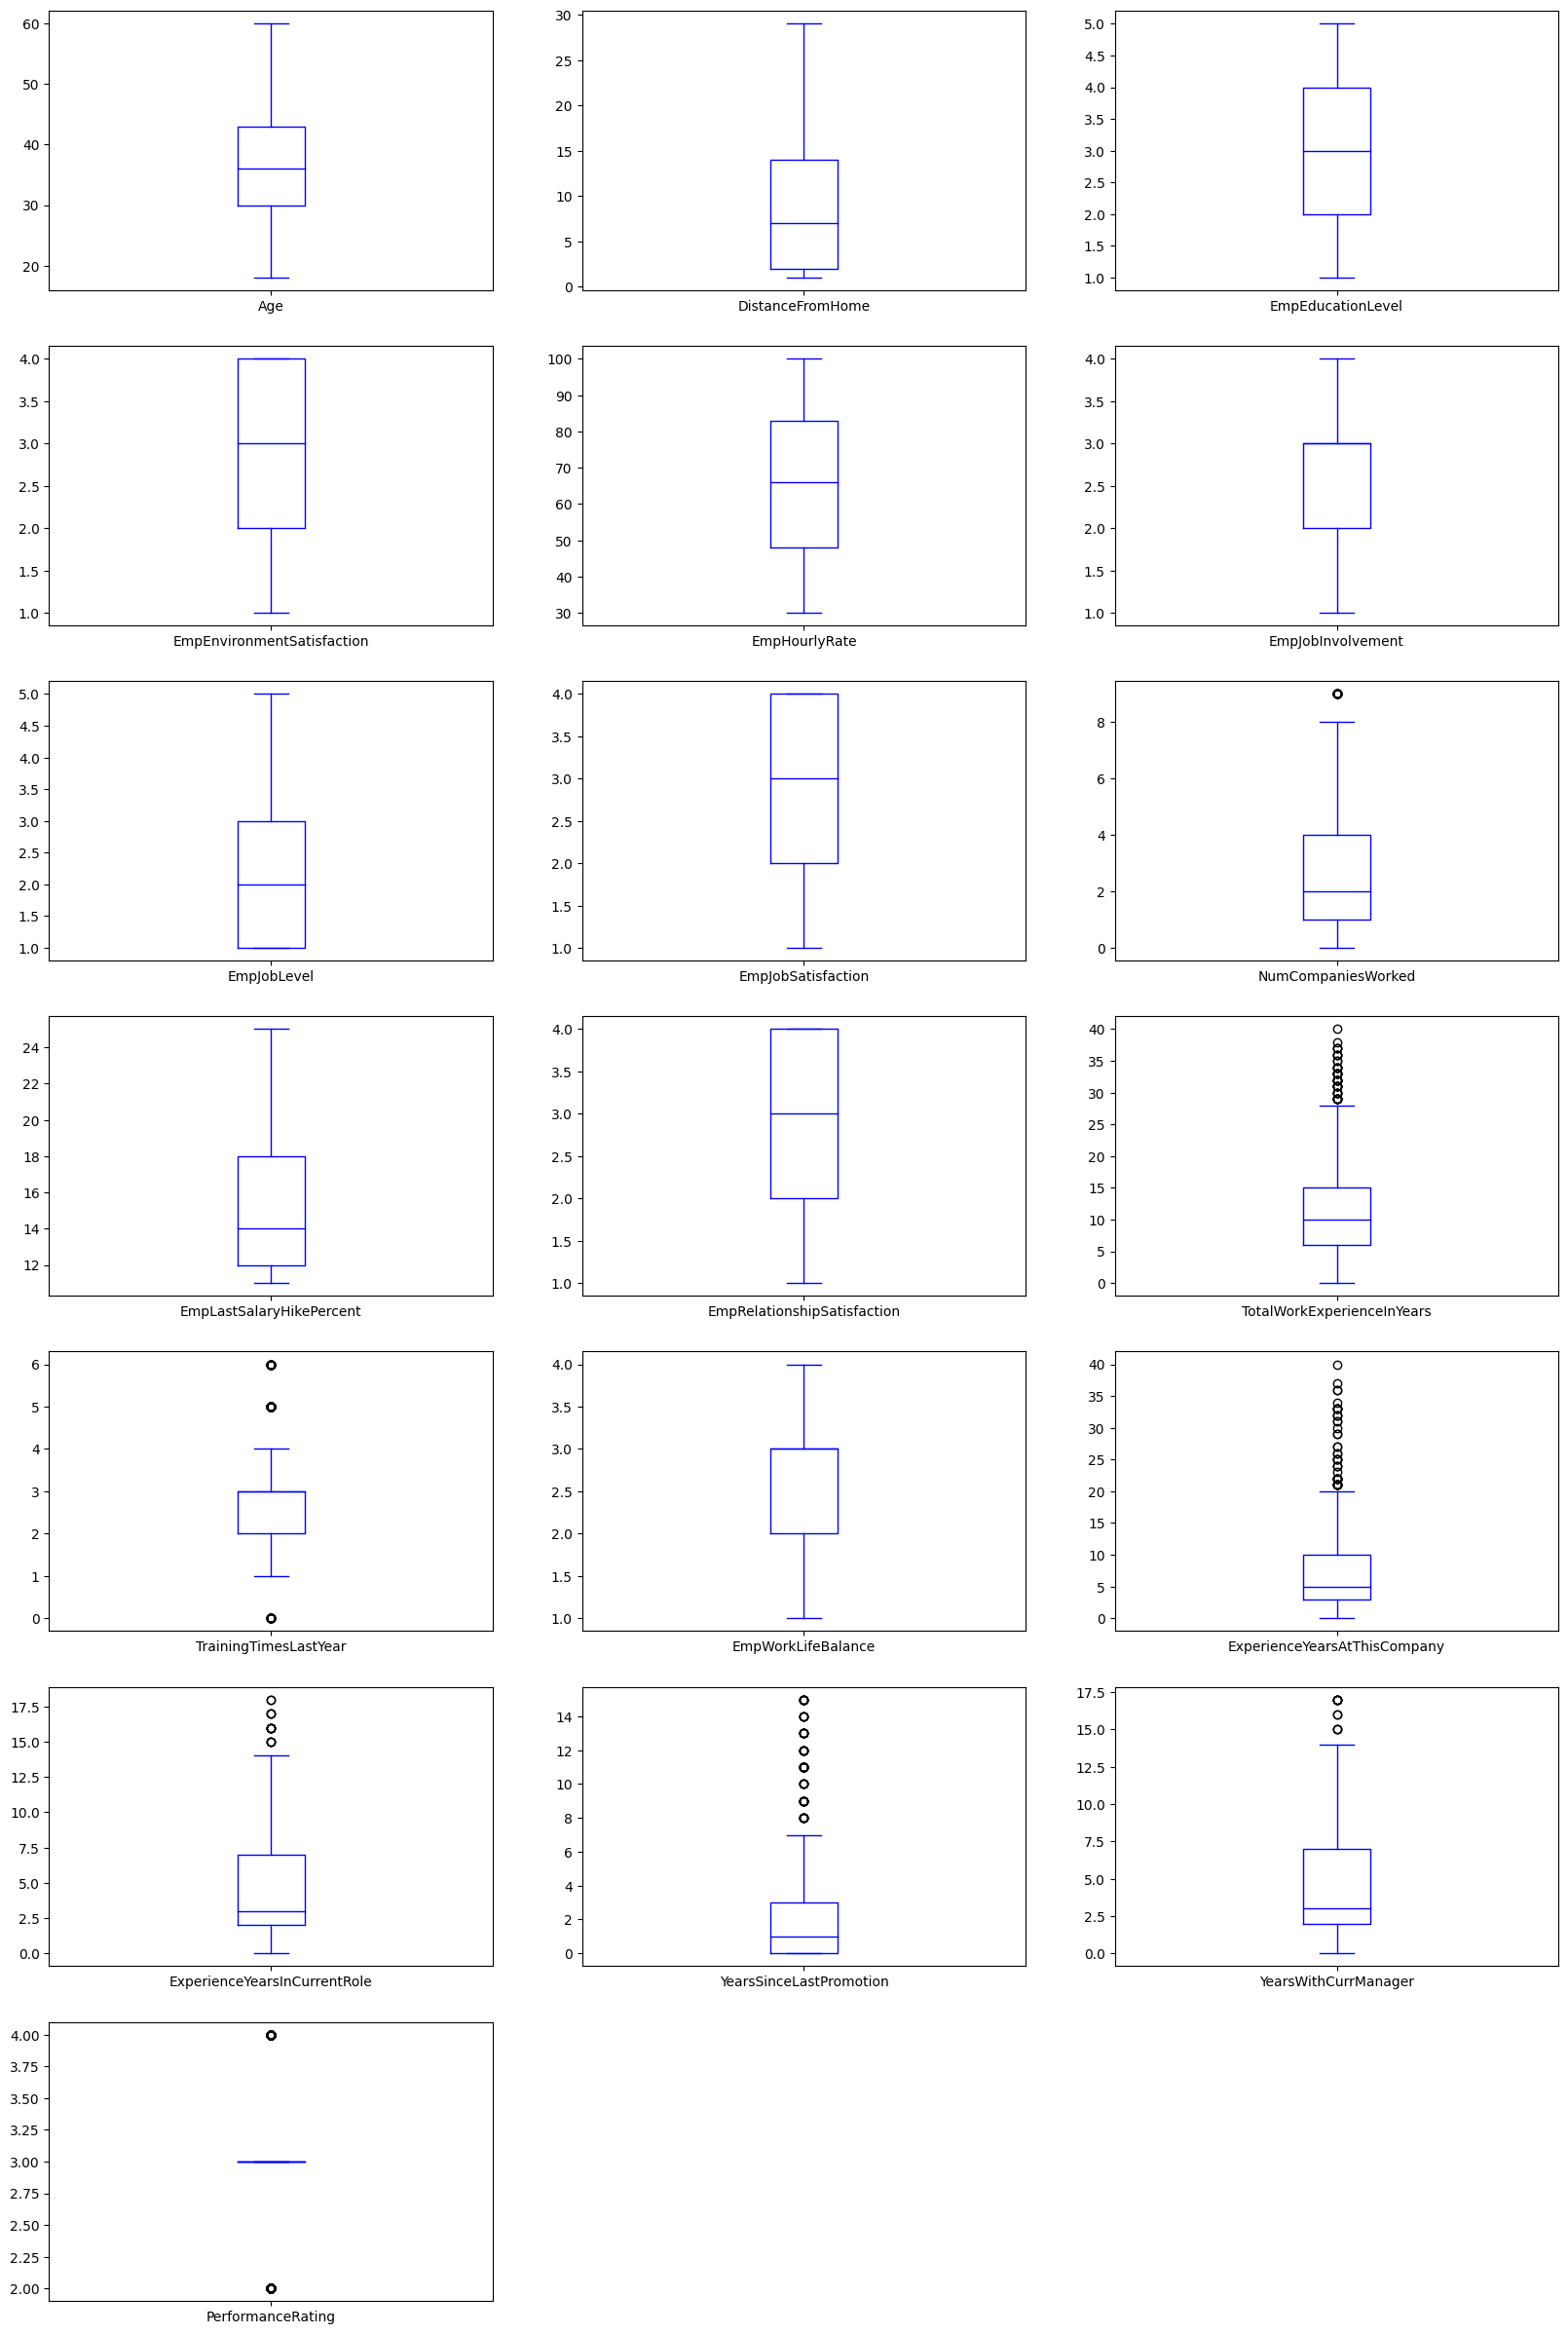

In [277]:
#handling outliers
numdata = data[numerical_features]
numdata.plot(kind='box', subplots=True, layout=(8,3), figsize=(20, 35), color='Blue');

In [280]:
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,3,2,5,18,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,3,2,5,18,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,5,1,5,18,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,2,11,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,3,2,5,18,2,16,4,...,4,10,1,3,2,2,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,0,4,0,5,18,1,3,1,...,2,6,3,3,6,5,0,4,0,4
1196,E100993,37,1,5,2,4,12,2,10,2,...,1,4,2,3,1,0,0,0,0,3
1197,E100994,50,1,4,1,4,12,2,28,1,...,3,20,3,3,20,8,3,8,0,3
1198,E100995,34,0,4,2,0,5,2,9,3,...,2,9,3,4,8,7,7,7,0,3


In [494]:
# implementation the outlier handling using quartile percentile
numerical_data = ['TotalWorkExperienceInYears',
                  'ExperienceYearsAtThisCompany',
                  'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']  
def imputing_outlier(drop = False):
    for column in numerical_data:
        variable = data[column]
        Quartile_1 = np.percentile(variable, 25.) 
        Quartile_3 = np.percentile(variable, 75.) 
        interquartile_range = Quartile_3-Quartile_1 
        outlier_step = interquartile_range * 1.5 
        outliers = variable[~((variable >= Quartile_1 - outlier_step) & (variable <= Quartile_3 + outlier_step))].index.tolist()  
        if not drop:
            print('No of outliers are: '+ column + ' is', len(outliers))
        if drop:
            data.drop(outliers, inplace = True, errors = 'ignore')
            print('No of outliers removed', len(outliers))

imputing_outlier()

No of outliers are: TotalWorkExperienceInYears is 51
No of outliers are: ExperienceYearsAtThisCompany is 56
No of outliers are: ExperienceYearsInCurrentRole is 16
No of outliers are: YearsSinceLastPromotion is 88
No of outliers are: YearsWithCurrManager is 11


In [495]:
imputing_outlier(drop= True)#-- droping the outliers

No of outliers removed 51
No of outliers removed 64
No of outliers removed 4
No of outliers removed 117
No of outliers removed 15


# Feature Selection

<AxesSubplot: >

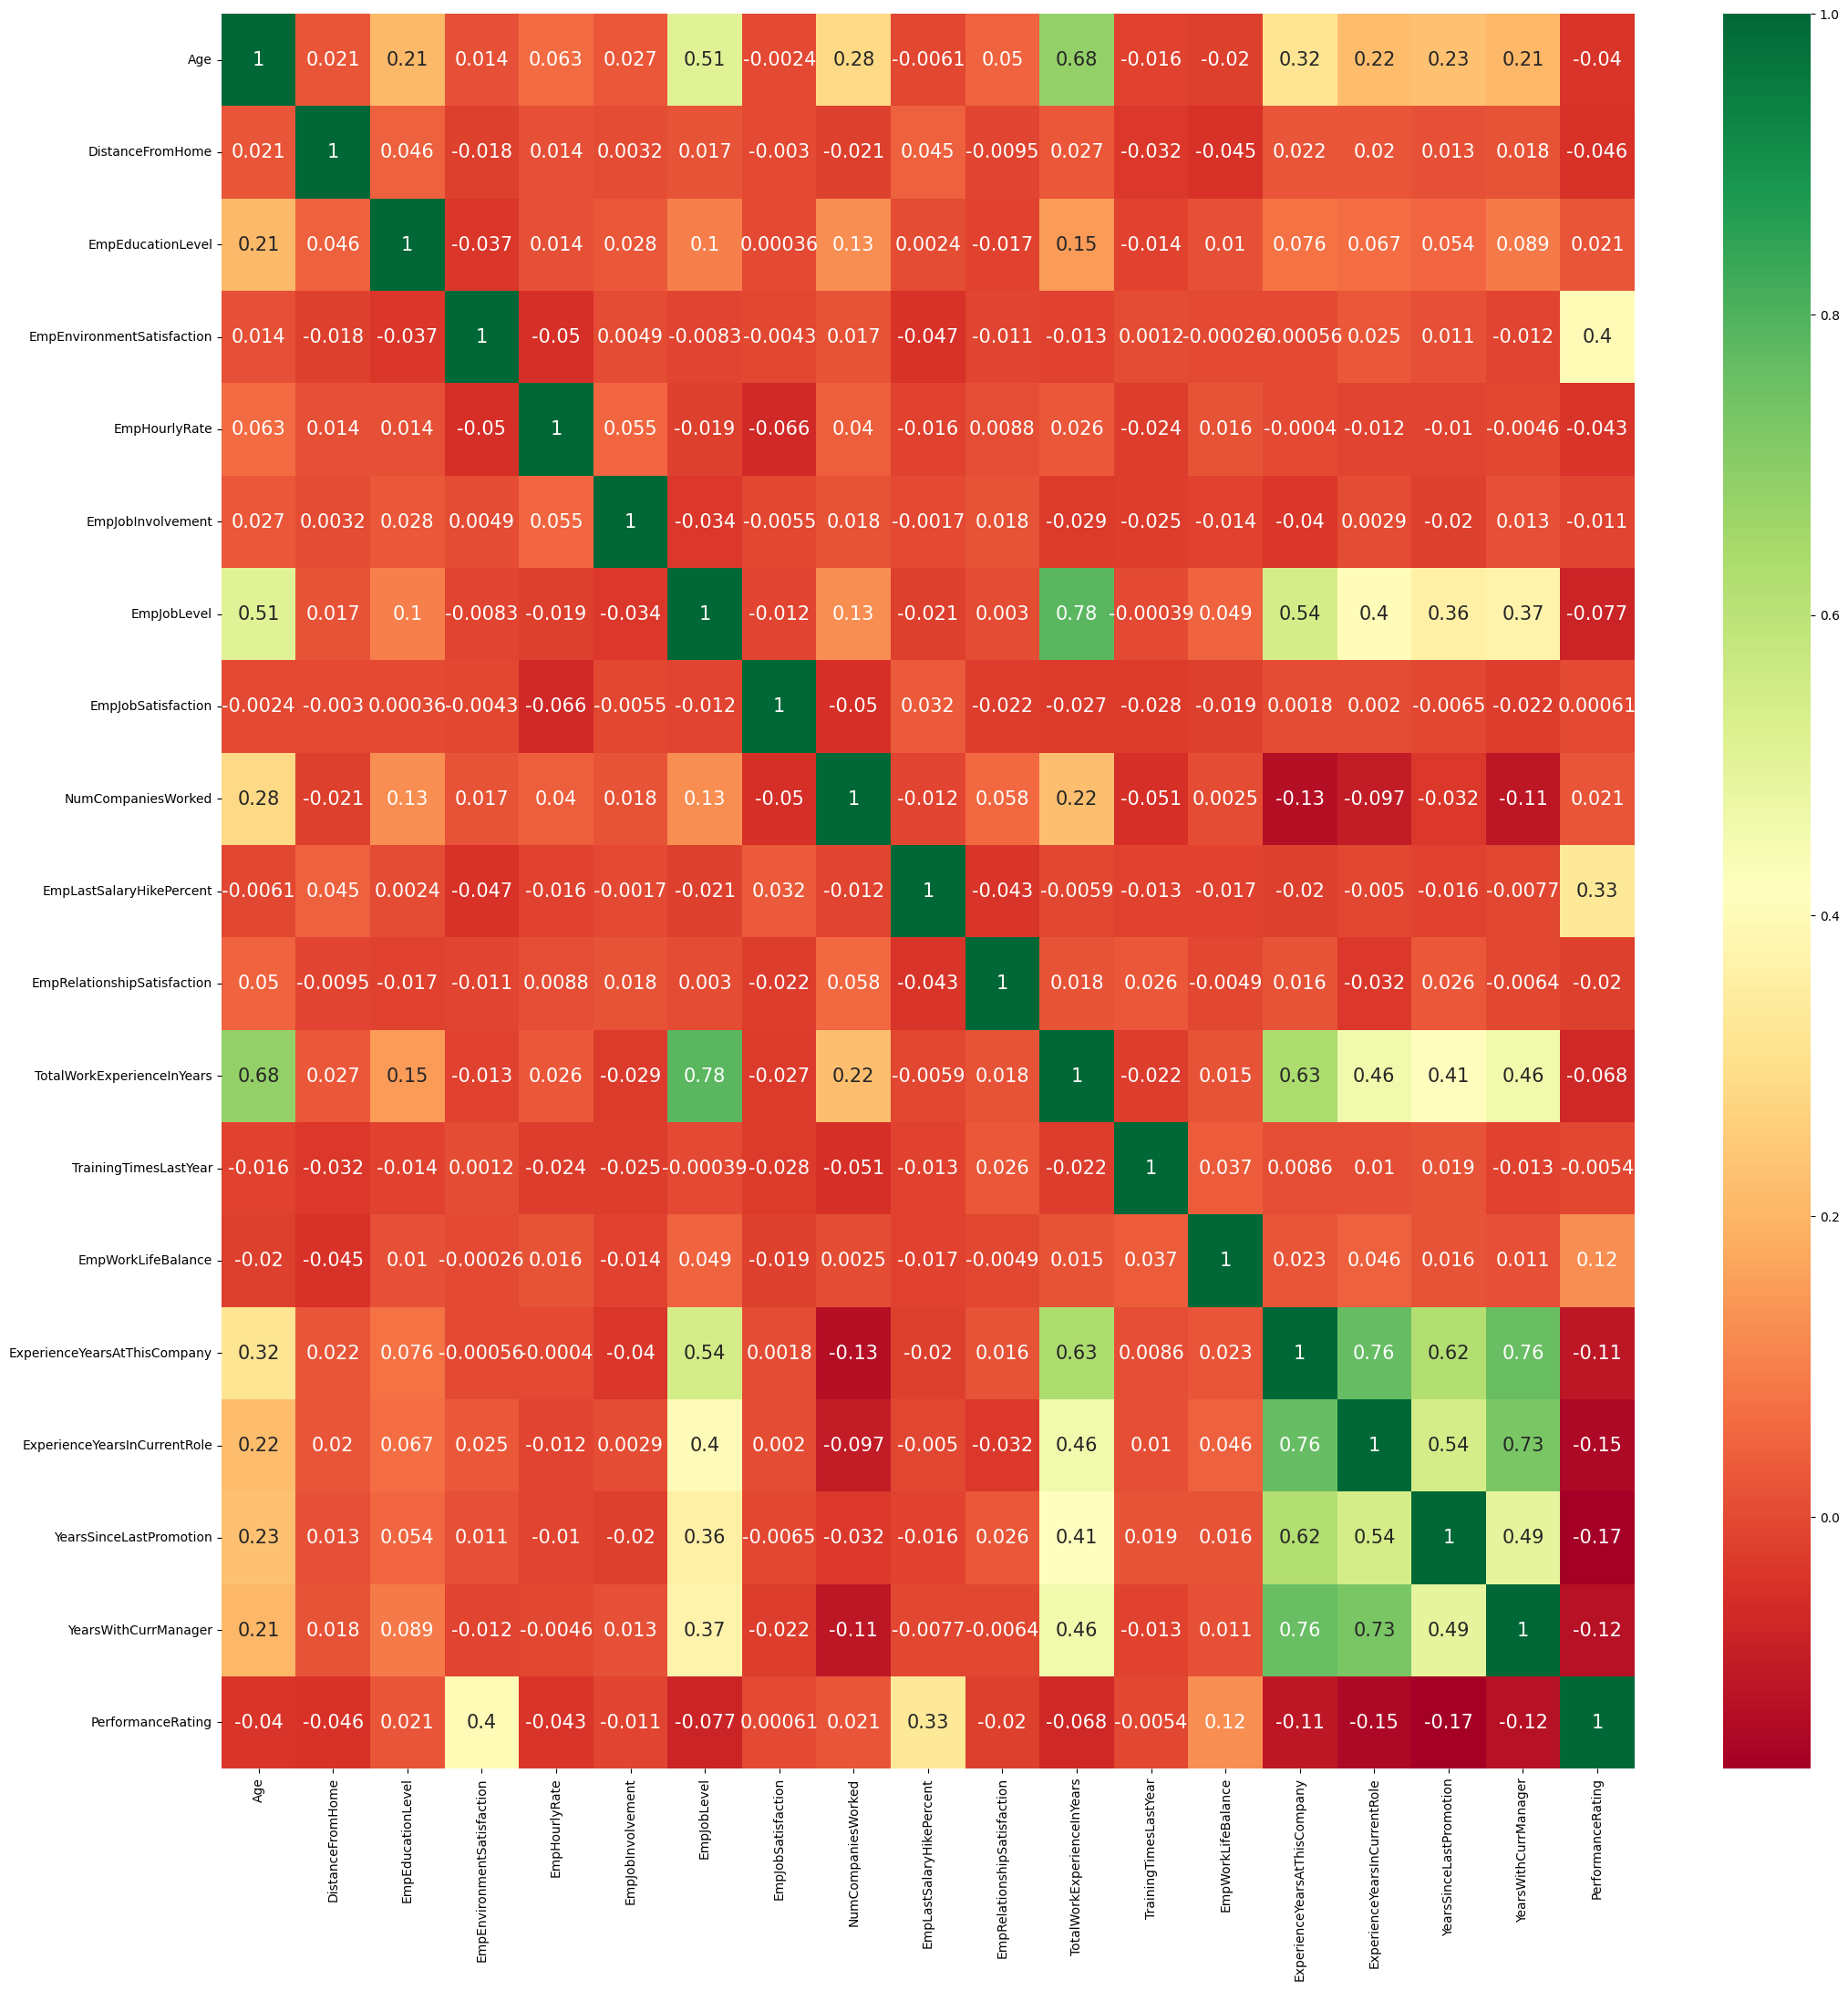

In [203]:
plt.figure(figsize = (25,25))
sns.heatmap(data[numerical_features].corr(),annot=True,cmap="RdYlGn", annot_kws={"size":15})

In [177]:
#Checking all features once if any unwanted column is remained.
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [591]:
#above we have found EmpNumber is constant and do provide any information for the model so droping it.
data.drop('EmpNumber',inplace=True,axis=1)

# Scaling

In [131]:
x_sm

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,1,3,2,5,18,2,10,3,4,...,12,4,10,2,2,10,7,0,8,3
1,47,1,3,2,5,18,2,14,4,4,...,12,4,20,2,3,7,7,1,7,3
2,40,1,5,1,5,18,1,5,4,4,...,21,3,20,2,3,18,13,1,12,4
3,41,1,0,0,2,11,2,10,4,2,...,15,2,23,2,2,21,6,12,6,3
4,60,1,3,2,5,18,2,16,4,1,...,14,4,10,1,3,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,30,0,4,1,3,16,2,11,1,3,...,12,3,1,2,2,1,0,0,0,3
2040,34,0,3,0,5,18,2,15,2,1,...,14,3,6,2,2,2,2,1,2,2
2041,41,1,1,0,2,6,1,6,4,2,...,19,4,10,2,3,3,2,0,2,4
2042,21,1,4,1,5,14,1,7,2,1,...,12,2,3,2,3,1,1,1,1,2


,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,-0.308196,0.930034,-0.517785,1.288712,1.200533,0.975425,0.757755,0.088747,0.284981,1.473347,...,-0.847942,1.421390,0.051783,-0.490217,-0.791026,0.683633,1.039768,-0.631927,1.387007,0.312174
1,1.317346,0.930034,-0.517785,1.288712,1.200533,0.975425,0.757755,0.586751,1.280711,1.473347,...,-0.847942,1.421390,1.394982,-0.490217,0.589723,0.179601,1.039768,-0.284052,1.085086,0.312174
2,0.558760,0.930034,1.068950,-0.107222,1.200533,0.975425,-0.763710,-0.533759,1.280711,1.473347,...,1.745365,0.459682,1.394982,-0.490217,0.589723,2.027720,2.823974,-0.284052,2.594693,2.211231
3,0.667130,0.930034,-2.897886,-1.503156,-1.595392,-0.741227,0.757755,0.088747,1.280711,-0.376482,...,0.016494,-0.502027,1.797942,-0.490217,-0.791026,2.531753,0.742401,3.542571,0.783164,0.312174
4,2.726149,0.930034,-0.517785,1.288712,1.200533,0.975425,0.757755,0.835753,1.280711,-1.301396,...,-0.271652,1.421390,0.051783,-1.340814,0.589723,-0.660454,-0.447070,0.063822,-0.424522,0.312174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,-0.524934,-1.075229,0.275582,-0.107222,-0.663417,0.484953,0.757755,0.213248,-1.706477,0.548433,...,-0.847942,0.459682,-1.157096,-0.490217,-0.791026,-0.828465,-1.041805,-0.631927,-1.028364,0.312174
2040,-0.091457,-1.075229,-0.517785,-1.503156,1.200533,0.975425,0.757755,0.711252,-0.710748,-1.301396,...,-0.271652,0.459682,-0.485497,-0.490217,-0.791026,-0.660454,-0.447070,-0.284052,-0.424522,-1.586884
2041,0.667130,0.930034,-2.104519,-1.503156,-1.595392,-1.967407,-0.763710,-0.409258,1.280711,-0.376482,...,1.169074,1.421390,0.051783,-0.490217,0.589723,-0.492443,-0.447070,-0.631927,-0.424522,2.211231
2042,-1.500260,0.930034,0.275582,-0.107222,1.200533,-0.005519,-0.763710,-0.284757,-0.710748,-1.301396,...,-0.847942,-0.502027,-0.888457,-0.490217,0.589723,-0.828465,-0.744438,-0.284052,-0.726443,-1.586884


# Now, separating target and dependent variables

In [592]:
# Spliting the independent and dependent features
x = data.drop('PerformanceRating',axis=1)
y= data.PerformanceRating 

# Checking imbalance in data

In [594]:
data.PerformanceRating.value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

In [595]:
# It has imbalance in data that is high number no Attrition whereas very less number of Attrition, so using SMOTE method from 
# over_sampling technique  to balance data so model never biase while generalization.
from collections import Counter
from imblearn.over_sampling import SMOTE
imbalance = SMOTE()
print(Counter(y))
x_sm, y_sm = imbalance.fit_resample(x,y)
print(Counter(y_sm))

Counter({3: 874, 2: 194, 4: 132})
Counter({3: 874, 4: 874, 2: 874})


In [596]:
x_sm.shape

(2622, 26)

# Scaling

In [597]:
# using StandardScaler for scaling the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_sm[:]= scale.fit_transform(x_sm[:])
x_sm

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,-0.509040,1.063817,-0.605164,1.476433,1.302669,1.036169,0.758275,0.173780,0.314879,1.501628,...,-1.110455,1.493317,-0.160467,-0.499234,-0.962866,0.486020,0.751057,-0.733994,1.142830,-0.297352
1,1.214492,1.063817,-0.605164,1.476433,1.302669,1.036169,0.758275,0.683029,1.334154,1.501628,...,-1.110455,1.493317,1.190673,-0.499234,0.524839,-0.020879,0.751057,-0.400742,0.845558,-0.297352
2,0.410177,1.063817,1.074814,0.029793,1.302669,1.036169,-0.666956,-0.462782,1.334154,1.501628,...,1.136160,0.504060,1.190673,-0.499234,0.524839,1.837752,2.484824,-0.400742,2.331918,-0.297352
3,0.525079,1.063817,-3.125130,-1.416846,-1.410276,-0.633088,0.758275,0.173780,1.334154,-0.342958,...,-0.361583,-0.485196,1.596015,-0.499234,-0.962866,2.344651,0.462096,3.265035,0.548286,-0.297352
4,2.708220,1.063817,-0.605164,1.476433,1.302669,1.036169,0.758275,0.937654,1.334154,-1.265251,...,-0.611207,1.493317,-0.160467,-1.377752,0.524839,-0.865711,-0.693750,-0.067489,-0.640801,-0.297352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,-0.049432,-0.940011,-0.605164,1.476433,1.302669,1.036169,-0.666956,-0.208157,0.314879,0.579335,...,0.387288,-1.474452,-0.430695,0.379284,-0.962866,-0.020879,0.751057,-0.733994,-0.343529,-0.297352
2618,-0.509040,-0.940011,1.074814,-1.416846,0.398354,0.797704,-2.092187,0.428404,0.314879,0.579335,...,1.635407,-0.485196,-0.565809,-0.499234,0.524839,-0.358812,-0.115827,-0.400742,-0.640801,-0.297352
2619,-0.623942,-0.940011,-0.605164,0.029793,0.398354,0.320773,0.758275,2.083465,-0.704396,0.579335,...,1.385783,0.504060,-0.430695,-0.499234,0.524839,0.148087,0.751057,-0.733994,0.845558,-0.297352
2620,-0.279236,1.063817,1.074814,-1.416846,-2.314591,-1.348484,0.758275,-0.844719,-0.704396,0.579335,...,0.886536,-1.474452,-0.025353,0.379284,0.524839,-0.358812,-0.115827,-0.733994,-0.046257,-0.297352


# Creating Training and Validation set using cross validation

In [290]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer, classification_report
kf = KFold(n_splits= 10)

For given dataset, it is based on classification problem so applying various classfication models to get better results best on
predictions using various parameters.

### Applying Model 

In [291]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5) #--giving 5 at first

#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

#RandomForest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100)

#SupportVectorMachines
from sklearn.svm import SVC
SVM = SVC()



In [292]:
# function for getting score by passing each models.
def get_score(model,x_train,x_test,y_train,y_test):    
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    score = accuracy_score(y_test,y_predict)
    return score

In [293]:
#using cross validation splitting function and applying each models and passing to the get_score() function for capturing each splitted score
Logistic_score_cv = []
KNN_score_cv = []
DT_score_cv = []
RF_score_cv = []
SVM_score_cv = []
for train,test in kf.split(x_sm,y_sm):
    X_train, X_test, y_train,y_test = x_sm.iloc[train],x_sm.iloc[test],y_sm.iloc[train],y_sm.iloc[test]
    Logistic_score_cv.append(get_score(LR,X_train,X_test,y_train,y_test))
    KNN_score_cv.append(get_score(KNN,X_train,X_test,y_train,y_test))
    DT_score_cv.append(get_score(DT,X_train,X_test,y_train,y_test))
    RF_score_cv.append(get_score(RF,X_train,X_test,y_train,y_test))
    SVM_score_cv.append(get_score(SVM,X_train,X_test,y_train,y_test))
    

c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [270]:
# just used for clearing list of scores stored of each models.
KNN_score.clear()
Logistic_score.clear()
DT_score.clear()
RF_score.clear()
SVM_score.clear()

In [298]:
#Displaying the score of LogisticRegression model of each split
Logistic_score_cv

[0.71875,
 0.76875,
 0.7875,
 0.775,
 0.7875,
 0.7125,
 0.78125,
 0.80625,
 0.9125,
 0.78125]

In [299]:
#Displaying the score of KNN model of each split
KNN_score_cv

[0.68125,
 0.6625,
 0.675,
 0.6625,
 0.7375,
 0.7625,
 0.9875,
 0.9875,
 0.96875,
 0.9625]

In [300]:
#Displaying the score of DecisionTree model of each split
DT_score_cv

[0.70625, 0.8, 0.71875, 0.74375, 0.725, 0.74375, 0.925, 0.925, 0.875, 0.925]

In [301]:
#Displaying the score of RandomForest model of each split
RF_score_cv

[0.85625,
 0.8875,
 0.89375,
 0.85625,
 0.875,
 0.91875,
 0.9625,
 0.96875,
 0.96875,
 0.96875]

In [302]:
#Displaying the score of SVC model of each split
SVM_score_cv

[0.65, 0.6375, 0.7, 0.625, 0.71875, 0.7125, 0.825, 0.80625, 0.8375, 0.825]

# Using Hyperparameter Tuning

In [308]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.30,random_state=42)

### LogisticRegression 

In [309]:
# using GridSrearchCV hyperparametres for logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

LR_model1 = LogisticRegression()
#new parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid_dict1 = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search1 = GridSearchCV(estimator=LR_model1, param_grid=grid_dict1, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_result1 = grid_search1.fit(x_train, y_train)
# summarize results
print("Best_score: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))


Best_score: 0.857143 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [314]:
LR = LogisticRegression(C=0.1,penalty='l2',solver='newton-cg')
LR.fit(x_sm,y_sm)
y_predict_lr = LR.predict(x_test)
accuracy_score(y_test,y_predict_lr)


0.8791666666666667

In [316]:
# Using RandomizedSearchCV hyperparametres for logistic regression


LR_model2 = LogisticRegression()
#new parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid_dict2 = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search2 = RandomizedSearchCV(estimator=LogisticRegression(), param_distributions=grid_dict2, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_result2 = grid_search2.fit(x_sm, y_sm)
# summarize results
print("Best_score: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

Best_score: 0.858125 using {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}


In [317]:
LR2 = LogisticRegression(C=0.1,penalty='l2',solver='newton-cg')
LR2.fit(x_sm,y_sm)
y_predict_lr2 = LR.predict(x_test)
accuracy_score(y_test,y_predict_lr)

0.8791666666666667

In [338]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix----",confusion_matrix(y_test,y_predict_lr2))
print("Classification Report----",classification_report(y_test,y_predict_lr2))

Confusion Matrix---- [[207  36]
 [ 22 215]]
Classification Report----               precision    recall  f1-score   support

           0       0.90      0.85      0.88       243
           1       0.86      0.91      0.88       237

    accuracy                           0.88       480
   macro avg       0.88      0.88      0.88       480
weighted avg       0.88      0.88      0.88       480



### KNN using GridSearchCV

In [35]:

grid_params_knn_gscv = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
grid_search_knn_gscv = GridSearchCV(KNeighborsClassifier(), grid_params_knn_gscv, verbose = 1, cv=10, n_jobs = -1)
grid_search_knn_gscv.fit(x_sm,y_sm)
print("Best_score: %f using %s" % (grid_search_knn_gscv.best_score_, grid_search_knn_gscv.best_params_))

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best_score: 0.846413 using {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [318]:
knn = KNeighborsClassifier(n_neighbors=5,metric='manhattan',weights='distance')
knn.fit(x_train,y_train)
y_predict_knn = knn.predict(x_test)
accuracy_score(y_test,y_predict_knn)

0.83125

In [339]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix----",confusion_matrix(y_test,y_predict_knn))
print("Classification Report----",classification_report(y_test,y_predict_knn))

Confusion Matrix---- [[165  78]
 [  3 234]]
Classification Report----               precision    recall  f1-score   support

           0       0.98      0.68      0.80       243
           1       0.75      0.99      0.85       237

    accuracy                           0.83       480
   macro avg       0.87      0.83      0.83       480
weighted avg       0.87      0.83      0.83       480



### KNN using RandomizedSearchCV

In [319]:
grid_params_knn_rscv = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
grid_search_knn_rscv = RandomizedSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=10, n_jobs = -1)
grid_search_knn_rscv.fit(x_sm,y_sm)
print("Best_score: %f using %s" % (grid_search_knn_rscv.best_score_, grid_search_knn_rscv.best_params_))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best_score: 0.845625 using {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}


In [320]:
knn2 = KNeighborsClassifier(n_neighbors=7,metric='manhattan',weights='distance')
knn2.fit(x_train,y_train)
y_predict_knn2 = knn2.predict(x_test)
accuracy_score(y_test,y_predict_knn2)

0.8145833333333333

In [340]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix----",confusion_matrix(y_test,y_predict_knn2))
print("Classification Report----",classification_report(y_test,y_predict_knn2))

Confusion Matrix---- [[159  84]
 [  5 232]]
Classification Report----               precision    recall  f1-score   support

           0       0.97      0.65      0.78       243
           1       0.73      0.98      0.84       237

    accuracy                           0.81       480
   macro avg       0.85      0.82      0.81       480
weighted avg       0.85      0.81      0.81       480



### DecisionTree using GridsearchCV

In [321]:

params_dt = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 21))), 
    "min_samples_split":[2, 3, 4,5,6], 
    "min_samples_leaf":list(range(1, 21)), 
}


model_dt1 = DecisionTreeClassifier(random_state=3)
grid_search_dt_gscv = GridSearchCV(model_dt1, params_dt, scoring="f1", n_jobs=-1, verbose=2, cv=10)
grid_search_dt_gscv.fit(x_sm,y_sm)
print("Best_score: %f using %s" % (grid_search_dt_gscv.best_score_, grid_search_dt_gscv.best_params_))

Fitting 10 folds for each of 8000 candidates, totalling 80000 fits
Best_score: 0.848653 using {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}


In [322]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=18,min_samples_leaf=1,min_samples_split=3,splitter='random')
dt.fit(x_train,y_train)
y_predict_dt = dt.predict(x_test)
accuracy_score(y_test,y_predict_dt)

0.8375

In [341]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix----",confusion_matrix(y_test,y_predict_dt))
print("Classification Report----",classification_report(y_test,y_predict_dt))

Confusion Matrix---- [[200  43]
 [ 35 202]]
Classification Report----               precision    recall  f1-score   support

           0       0.85      0.82      0.84       243
           1       0.82      0.85      0.84       237

    accuracy                           0.84       480
   macro avg       0.84      0.84      0.84       480
weighted avg       0.84      0.84      0.84       480



### DecisionTree using RandomizedSearchCV 

In [323]:
params_dt = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 21))), 
    "min_samples_split":[2, 3, 4,5,6], 
    "min_samples_leaf":list(range(1, 21)), 
}


model_dt2 = DecisionTreeClassifier(random_state=3)
grid_search_dt_rscv = RandomizedSearchCV(model_dt2, params_dt, scoring="f1", n_jobs=-1, verbose=2, cv=10)
grid_search_dt_rscv.fit(x_sm,y_sm)
print("Best_score: %f using %s" % (grid_search_dt_rscv.best_score_, grid_search_dt_rscv.best_params_))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best_score: 0.838607 using {'splitter': 'random', 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 19, 'criterion': 'gini'}


In [324]:
dt2 = DecisionTreeClassifier(criterion='gini',max_depth=19,min_samples_leaf=1,min_samples_split=4,splitter='random')
dt2.fit(x_train,y_train)
y_predict_dt2 = dt2.predict(x_test)
accuracy_score(y_test,y_predict_dt2)

0.8375

In [342]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix----",confusion_matrix(y_test,y_predict_dt2))
print("Classification Report----",classification_report(y_test,y_predict_dt2))

Confusion Matrix---- [[202  41]
 [ 37 200]]
Classification Report----               precision    recall  f1-score   support

           0       0.85      0.83      0.84       243
           1       0.83      0.84      0.84       237

    accuracy                           0.84       480
   macro avg       0.84      0.84      0.84       480
weighted avg       0.84      0.84      0.84       480



### RandomForest using GridSearchCV

In [337]:
n_estimators = [int(x) for x in np.linspace(start=50, stop=200, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 25, num=11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid_params = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

model_rf1 = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=model_rf1, scoring='f1',param_grid=random_grid_params, cv=3, 
                               verbose=3, n_jobs=-1)

grid_search_rf.fit(x_sm, y_sm)
print("Best_score: %f using %s" % (grid_search_rf.best_score_, grid_search_rf.best_params_))

Fitting 3 folds for each of 3960 candidates, totalling 11880 fits
Best_score: 0.909770 using {'bootstrap': False, 'max_depth': 19, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 66}


In [345]:
rf = RandomForestClassifier(bootstrap=False,max_depth=19,min_samples_leaf=1,min_samples_split=2,n_estimators=66)
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
accuracy_score(y_test,y_predict_rf)

0.9166666666666666

In [347]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix----",confusion_matrix(y_test,y_predict_rf))
print("Classification Report----",classification_report(y_test,y_predict_rf))

Confusion Matrix---- [[223  20]
 [ 20 217]]
Classification Report----               precision    recall  f1-score   support

           0       0.92      0.92      0.92       243
           1       0.92      0.92      0.92       237

    accuracy                           0.92       480
   macro avg       0.92      0.92      0.92       480
weighted avg       0.92      0.92      0.92       480



### RandomForest using RandomizedSearchCV


In [336]:
n_estimators = [int(x) for x in np.linspace(start=50, stop=200, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 25, num=11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid_params = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

model_rf2 = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=model_rf2, scoring='f1',param_grid=random_grid_params, cv=3, 
                               verbose=3, n_jobs=-1)

grid_search_rf.fit(x_train, y_train)
print("Best_score: %f using %s" % (grid_search_rf.best_score_, grid_search_rf.best_params_))

Fitting 3 folds for each of 3960 candidates, totalling 11880 fits
Best_score: 0.920069 using {'bootstrap': False, 'max_depth': 19, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 133}


In [350]:
rf2 = RandomForestClassifier(bootstrap=False,max_depth=19,min_samples_leaf=1,min_samples_split=2,n_estimators=133,max_features='auto')
rf2.fit(x_train,y_train)
y_predict_rf2 = rf2.predict(x_test)
accuracy_score(y_test,y_predict_rf2)

0.9208333333333333

In [353]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix----",confusion_matrix(y_test,y_predict_rf2))
print("Classification Report----",classification_report(y_test,y_predict_rf2))

Confusion Matrix---- [[226  17]
 [ 21 216]]
Classification Report----               precision    recall  f1-score   support

           0       0.91      0.93      0.92       243
           1       0.93      0.91      0.92       237

    accuracy                           0.92       480
   macro avg       0.92      0.92      0.92       480
weighted avg       0.92      0.92      0.92       480



### SVM using GridSearchCV

In [351]:
# using GridSrearchCV hyperparametres for SVC

from sklearn import svm

grid_search_svm= GridSearchCV(svm.SVC(gamma = 'scale'),{
    'C' : [1,10,20,50],
    'kernel': ['rbf','linear']
    
},cv=10, return_train_score = False)

grid_search_svm.fit(x_sm,y_sm)
print("Best_score: %f using %s" % (grid_search_svm.best_score_, grid_search_svm.best_params_))

Best_score: 0.871875 using {'C': 50, 'kernel': 'rbf'}


In [364]:
from sklearn.svm import SVC
sv = SVC(C=50,kernel='rbf')
sv.fit(x_train,y_train)
y_predict_svm = sv.predict(x_test)
accuracy_score(y_test,y_predict_svm)

0.8770833333333333

In [366]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix----",confusion_matrix(y_test,y_predict_svm))
print("Classification Report----",classification_report(y_test,y_predict_svm))

Confusion Matrix---- [[206  37]
 [ 22 215]]
Classification Report----               precision    recall  f1-score   support

           0       0.90      0.85      0.87       243
           1       0.85      0.91      0.88       237

    accuracy                           0.88       480
   macro avg       0.88      0.88      0.88       480
weighted avg       0.88      0.88      0.88       480



### SVM using RandomizedSearchCV

In [375]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.svm import SVC

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]

max_features = ['auto', 'sqrt']

random_grid_svm = {'C': n_estimators,
               'kernel': ['rbf','linear']}
param_grid = dict(max_features = max_features, n_estimators = n_estimators)


random_svm = RandomizedSearchCV(estimator = SVC(gamma = 'scale'), param_distributions = random_grid_svm, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

random_svm.fit(x_train, y_train)

print("Best_score: %f using %s" % (random_svm.best_score_, random_svm.best_params_))

c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best_score: 0.877679 using {'kernel': 'rbf', 'C': 83}


In [378]:
from sklearn.svm import SVC
sv2 = SVC(C=83,kernel='rbf')
sv2.fit(x_train,y_train)
y_predict_svm2 = sv2.predict(x_test)
accuracy_score(y_test,y_predict_svm2)

0.88125

In [379]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix----",confusion_matrix(y_test,y_predict_svm2))
print("Classification Report----",classification_report(y_test,y_predict_svm2))

Confusion Matrix---- [[205  38]
 [ 19 218]]
Classification Report----               precision    recall  f1-score   support

           0       0.92      0.84      0.88       243
           1       0.85      0.92      0.88       237

    accuracy                           0.88       480
   macro avg       0.88      0.88      0.88       480
weighted avg       0.88      0.88      0.88       480



# Now applying Principal Componet Analysis to reduce unwanted features

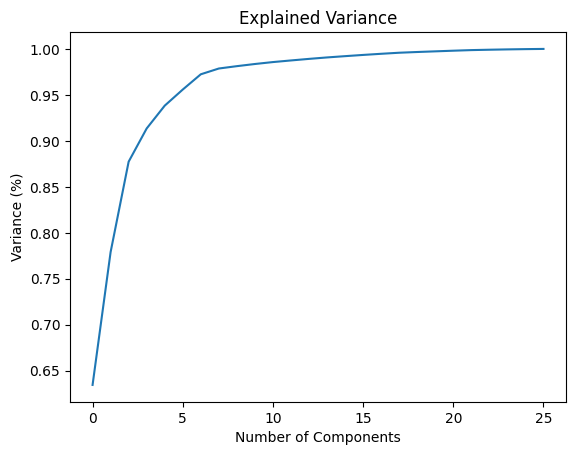

In [499]:
#Importing PCA class
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x_sm,y_sm)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In above diagram, after using PCA class it is showing the number of features which are most important. So, betwenn 5 to 10 components the graph is giving constant line i.e it is not giving much variance in the components. I am using 10 components features.

In [458]:
x_sm

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,-0.167897,0.911407,-0.543672,1.226365,1.213831,0.952081,0.761473,0.056700,0.326404,1.459108,...,-0.890611,1.421557,0.418316,-0.500338,-0.774634,1.795068,1.660524,-0.670696,2.145213,0.205193
1,1.590956,0.911407,-0.543672,1.226365,1.213831,0.952081,0.761473,0.551761,1.319270,1.459108,...,-0.890611,1.421557,2.206949,-0.500338,0.591864,0.891415,1.660524,0.228812,1.760033,0.205193
2,3.115296,0.911407,-0.543672,1.226365,1.213831,0.952081,0.761473,0.799292,1.319270,-1.310255,...,-0.307679,1.421557,0.418316,-1.338600,0.591864,-0.614672,-0.225364,1.128321,-0.165868,0.205193
3,-0.754182,0.911407,1.059784,-1.527578,0.291204,0.702804,-0.748263,0.056700,-0.666461,1.459108,...,1.732584,0.440327,0.239453,1.176187,-0.774634,1.493850,1.660524,0.228812,1.760033,2.219356
4,1.942727,0.911407,-0.543672,-0.150606,1.213831,-0.045026,0.761473,-0.190831,1.319270,1.459108,...,-0.016213,1.421557,-0.654863,-0.500338,0.591864,-0.614672,-0.225364,1.128321,-0.165868,0.205193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,-0.754182,0.911407,-0.543672,-0.150606,-0.631423,0.204251,0.761473,-1.057188,0.326404,-1.310255,...,-0.307679,-0.540903,-0.654863,0.337925,1.958363,-0.313454,0.151814,1.128321,0.219312,-1.808970
1596,-1.692237,-1.097204,-1.345400,-0.150606,1.213831,-0.045026,-0.748263,-1.057188,-1.659326,-0.387134,...,1.441118,-1.522133,-1.191453,1.176187,1.958363,-1.217107,-0.979718,-0.670696,-0.936229,0.205193
1597,-1.457723,-1.097204,1.059784,1.226365,-0.631423,-0.543579,-0.748263,0.056700,-0.666461,-1.310255,...,1.149652,-0.540903,-1.191453,-0.500338,-2.141132,-0.915889,-0.602541,0.228812,-0.551049,-1.808970
1598,-0.050640,-1.097204,-0.543672,1.226365,1.213831,0.952081,-0.748263,0.923058,0.326404,-1.310255,...,-0.307679,-0.540903,-0.118273,0.337925,-0.774634,-0.313454,-0.225364,-0.670696,-0.165868,0.205193


In [469]:
pc1 = PCA(0.9)#---it extraction 95 percentage of data from the features
x_sm_pc = pc1.fit_transform(x_sm)

In [509]:
principal_c = PCA(0.95)#---it extraction 95 percentage of data from the features
principal_ca = principal_c.fit_transform(x_sm)

In [510]:
principal_ca.shape #----it generated 6 components with high importance features

(1600, 6)

In [505]:
principal_ca

array([[ 1.03522981e+01,  2.31067241e+00, -6.49158326e-01,
         8.97676675e+00, -4.20418148e+00, -1.65453770e+00],
       [ 2.23558001e+01,  2.05909720e+01, -3.56778500e-01,
         4.85708219e+00, -4.30688167e+00, -3.00687153e+00],
       [-1.99242297e+01,  2.39028622e+01,  2.70848809e+00,
        -1.13695207e+01, -4.15799280e+00,  5.92859948e-01],
       ...,
       [-1.78134408e+00, -1.29392873e+01,  8.75491896e-03,
        -3.92483508e-01,  1.98175799e-02, -3.39092616e+00],
       [ 3.78253777e+00,  4.81120900e-01,  7.56783020e+00,
        -2.84224584e+00, -2.84995664e+00, -4.30116206e+00],
       [ 3.13268657e+01, -5.91961515e+00,  1.00779370e+01,
        -2.78936232e+00, -1.46661187e+00,  1.64629189e+00]])

In [511]:
pd.DataFrame(principal_ca)#--looking into dataframe


,0,1,2,3,4,5
0,10.352298,2.310672,-0.649158,8.976767,-4.204181,-1.654538
1,22.355800,20.590972,-0.356778,4.857082,-4.306882,-3.006872
2,-19.924230,23.902862,2.708488,-11.369521,-4.157993,0.592860
3,33.701236,-1.119810,-0.361728,9.690078,-2.675567,6.104870
4,10.520090,12.894068,-4.358391,-10.012389,-0.313117,1.967217
...,...,...,...,...,...,...
1595,0.583869,-7.343119,16.440180,-3.139169,-2.128844,2.050035
1596,31.939327,-3.569017,3.314411,0.507023,-1.863555,-1.843143
1597,-1.781344,-12.939287,0.008755,-0.392484,0.019818,-3.390926
1598,3.782538,0.481121,7.567830,-2.842246,-2.849957,-4.301162


In [518]:
pca_components = pd.DataFrame(principal_c.components_)
print('Top 6 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {data.columns[indices].to_list()}')

Top 6 most important features in each component
Component 0: ['Gender', 'EmpJobRole', 'EmpDepartment', 'Age']
Component 1: ['EmpJobRole', 'Gender', 'Age', 'MaritalStatus']
Component 2: ['Gender', 'MaritalStatus', 'EmpJobRole', 'Age']
Component 3: ['EmpJobRole', 'MaritalStatus', 'EducationBackground', 'Age']
Component 4: ['MaritalStatus', 'Gender', 'Age', 'EducationBackground']
Component 5: ['EmpJobRole', 'EducationBackground', 'Age', 'MaritalStatus']


### applying models using PCA

In [87]:
Logistic_score_pca = []
KNN_score_pca = []
DT_score_pca = []
RF_score_pca = []
SVM_score_pca = []
for train,test in kf.split(x_sm_pca,y_sm):
    X_train, X_test, y_train,y_test = x_sm_pca[train],x_sm_pca[test],y_sm.iloc[train],y_sm.iloc[test]
    Logistic_score_pca.append(get_score(LogisticRegression(),X_train,X_test,y_train,y_test))
    KNN_score_pca.append(get_score(KNeighborsClassifier(n_neighbors=5),X_train,X_test,y_train,y_test))
    DT_score_pca.append(get_score(DecisionTreeClassifier(),X_train,X_test,y_train,y_test))
    RF_score_pca.append(get_score(RandomForestClassifier(n_estimators=100),X_train,X_test,y_train,y_test))
    SVM_score_pca.append(get_score(SVC(),X_train,X_test,y_train,y_test))

In [94]:
Logistic_score_pca #--score of logistic regression applying pca

[0.6,
 0.5609756097560976,
 0.6195121951219512,
 0.5463414634146342,
 0.6029411764705882,
 0.6519607843137255,
 0.6813725490196079,
 0.6617647058823529,
 0.7058823529411765,
 0.7352941176470589]

In [95]:
KNN_score_pca #---score of KNN applying pca

[0.7073170731707317,
 0.7268292682926829,
 0.6780487804878049,
 0.6439024390243903,
 0.6715686274509803,
 0.7450980392156863,
 0.9607843137254902,
 0.946078431372549,
 0.9803921568627451,
 0.9803921568627451]

In [99]:
DT_score_pca #---score of Descition Tree applying pca

[0.7365853658536585,
 0.697560975609756,
 0.7609756097560976,
 0.7121951219512195,
 0.7696078431372549,
 0.7598039215686274,
 0.8186274509803921,
 0.7990196078431373,
 0.7745098039215687,
 0.8088235294117647]

In [100]:
RF_score_pca #---score of RandomForest applying pca

[0.7902439024390244,
 0.7902439024390244,
 0.8,
 0.824390243902439,
 0.8088235294117647,
 0.8676470588235294,
 0.9362745098039216,
 0.8578431372549019,
 0.8627450980392157,
 0.8823529411764706]

In [102]:
SVM_score_pca #---score of SVM applying pca

[0.6390243902439025,
 0.6390243902439025,
 0.7121951219512195,
 0.6341463414634146,
 0.6666666666666666,
 0.7205882352941176,
 0.7107843137254902,
 0.6519607843137255,
 0.7058823529411765,
 0.7794117647058824]

# Using feature selection technique- Recursive Feature Technique(RFE)

Feature selection is considered as the one of the important parts of the feature engineering. It is the process of selecting the most relevant variables or features so that machine learning algorithms can perform most optimal level. Using feature selection techniques, it helps to minimize or eliminate irrelevant features and select only usable features that impact the models for better prediction. It finds the correlation between the variables that how one feature is related to the other features that provides the same information based on that one feature can be reduced. There is multiple technique for handling features technique- Filter method, wrapper method, intrinsic method, and correlation matrix with heatmap method. I use wrapper method Recursive Feature Elimination.

In [380]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
rfe1 = RFE(estimator = RandomForestClassifier(n_estimators=100), n_features_to_select=10,importance_getter='auto')
# x = data.drop('Attrition',axis=1)
# y = data_heart['target']
rfe1.fit(x_sm,y_sm)

RFE(estimator=RandomForestClassifier(), n_features_to_select=10)

In [381]:
print(rfe1.feature_names_in_)

['Age' 'Gender' 'EducationBackground' 'MaritalStatus' 'EmpDepartment'
 'EmpJobRole' 'BusinessTravelFrequency' 'DistanceFromHome'
 'EmpEducationLevel' 'EmpEnvironmentSatisfaction' 'EmpHourlyRate'
 'EmpJobInvolvement' 'EmpJobLevel' 'EmpJobSatisfaction'
 'NumCompaniesWorked' 'OverTime' 'EmpLastSalaryHikePercent'
 'EmpRelationshipSatisfaction' 'TotalWorkExperienceInYears'
 'TrainingTimesLastYear' 'EmpWorkLifeBalance'
 'ExperienceYearsAtThisCompany' 'ExperienceYearsInCurrentRole'
 'YearsSinceLastPromotion' 'YearsWithCurrManager' 'PerformanceRating']


In [382]:
for i, col in zip(range(x.shape[1]),x.columns):
    print(f"{col} selected: {rfe1.support_[i]} with selection rank = {rfe1.ranking_[i]}")

Age selected: True with selection rank = 1
Gender selected: False with selection rank = 17
EducationBackground selected: False with selection rank = 2
MaritalStatus selected: False with selection rank = 14
EmpDepartment selected: False with selection rank = 13
EmpJobRole selected: False with selection rank = 3
BusinessTravelFrequency selected: False with selection rank = 8
DistanceFromHome selected: True with selection rank = 1
EmpEducationLevel selected: False with selection rank = 10
EmpEnvironmentSatisfaction selected: True with selection rank = 1
EmpHourlyRate selected: True with selection rank = 1
EmpJobInvolvement selected: True with selection rank = 1
EmpJobLevel selected: True with selection rank = 1
EmpJobSatisfaction selected: True with selection rank = 1
NumCompaniesWorked selected: False with selection rank = 9
OverTime selected: False with selection rank = 15
EmpLastSalaryHikePercent selected: False with selection rank = 4
EmpRelationshipSatisfaction selected: False with s

### applying models using RFE technique

In [598]:
#here 10 features show first rank for the high feature importance.
data_after_rfe = x_sm[['Age','DistanceFromHome','EmpEnvironmentSatisfaction','EmpHourlyRate','EmpJobInvolvement','EmpJobLevel',
                     'EmpJobSatisfaction','TotalWorkExperienceInYears','ExperienceYearsAtThisCompany','YearsWithCurrManager']]

In [599]:
data_after_rfe

,Age,DistanceFromHome,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,TotalWorkExperienceInYears,ExperienceYearsAtThisCompany,YearsWithCurrManager
0,-0.509040,0.173780,1.501628,-0.547520,0.596605,0.068104,1.371048,-0.160467,0.486020,1.142830
1,1.214492,0.683029,1.501628,-1.191019,0.596605,0.068104,-1.460315,1.190673,-0.020879,0.845558
2,0.410177,-0.462782,1.501628,-0.894019,-0.825484,1.028145,-1.460315,1.190673,1.837752,2.331918
3,0.525079,0.173780,-0.342958,0.343479,-0.825484,2.948228,1.371048,1.596015,2.344651,0.548286
4,2.708220,0.937654,-1.265251,0.887978,0.596605,0.068104,-1.460315,-0.160467,-0.865711,-0.640801
...,...,...,...,...,...,...,...,...,...,...
2617,-0.049432,-0.208157,0.579335,-0.993019,-0.825484,0.068104,1.371048,-0.430695,-0.020879,-0.343529
2618,-0.509040,0.428404,0.579335,-1.389018,0.596605,-0.891938,0.427260,-0.565809,-0.358812,-0.640801
2619,-0.623942,2.083465,0.579335,1.085978,-0.825484,-0.891938,0.427260,-0.430695,0.148087,0.845558
2620,-0.279236,-0.844719,0.579335,0.590978,0.596605,-0.891938,-1.460315,-0.025353,-0.358812,-0.046257


In [393]:
y_sm

0       0
1       0
2       0
3       0
4       0
       ..
1595    1
1596    1
1597    1
1598    1
1599    1
Name: Attrition, Length: 1600, dtype: int64

In [400]:
Logistic_score_rfe = []
KNN_score_rfe = []
DT_score_rfe = []
RF_score_rfe = []
SVM_score_rfe = []
for train,test in kf.split(data_after_rfe,y_sm):
    X_train, X_test, y_train,y_test = data_after_rfe.iloc[train],data_after_rfe.iloc[test],y_sm.iloc[train],y_sm.iloc[test]
    Logistic_score_rfe.append(get_score(LogisticRegression(),X_train,X_test,y_train,y_test))
    KNN_score_rfe.append(get_score(KNeighborsClassifier(n_neighbors=5),X_train,X_test,y_train,y_test))
    DT_score_rfe.append(get_score(DecisionTreeClassifier(),X_train,X_test,y_train,y_test))
    RF_score_rfe.append(get_score(RandomForestClassifier(n_estimators=100),X_train,X_test,y_train,y_test))
    SVM_score_rfe.append(get_score(SVC(),X_train,X_test,y_train,y_test))

In [402]:
Logistic_score_rfe

[0.725,
 0.78125,
 0.74375,
 0.7375,
 0.78125,
 0.8,
 0.88125,
 0.8625,
 0.9125,
 0.81875]

In [404]:
KNN_score_rfe

[0.75,
 0.76875,
 0.74375,
 0.75625,
 0.78125,
 0.86875,
 0.9625,
 0.98125,
 0.95,
 0.95625]

In [406]:
DT_score_rfe

[0.69375,
 0.7875,
 0.7375,
 0.73125,
 0.79375,
 0.7375,
 0.8625,
 0.925,
 0.86875,
 0.90625]

In [408]:
RF_score_rfe

[0.78125,
 0.85,
 0.84375,
 0.80625,
 0.86875,
 0.8875,
 0.9375,
 0.9375,
 0.9625,
 0.925]

In [409]:
SVM_score_rfe

[0.7375,
 0.7875,
 0.76875,
 0.775,
 0.775,
 0.825,
 0.90625,
 0.90625,
 0.93125,
 0.86875]

# Result


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'DecisionTree'),
  Text(3, 0, 'RandomForest'),
  Text(4, 0, 'SVM')])

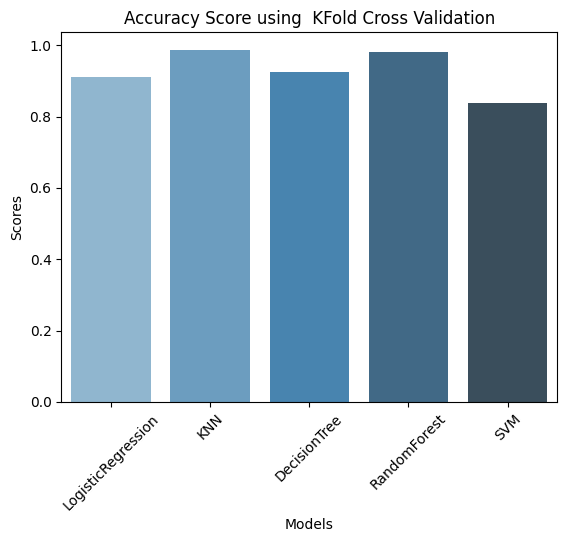

In [433]:
result_data = {'Models':['LogisticRegression','KNN','DecisionTree','RandomForest','SVM'],
              'Score':[0.912,0.987,0.925,0.981,0.837]}
sns.barplot(x=result_data['Models'],y=result_data['Score'],palette=("Blues_d"))
plt.title('Accuracy Score using  KFold Cross Validation')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation= 45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'DecisionTree'),
  Text(3, 0, 'RandomForest'),
  Text(4, 0, 'SVM')])

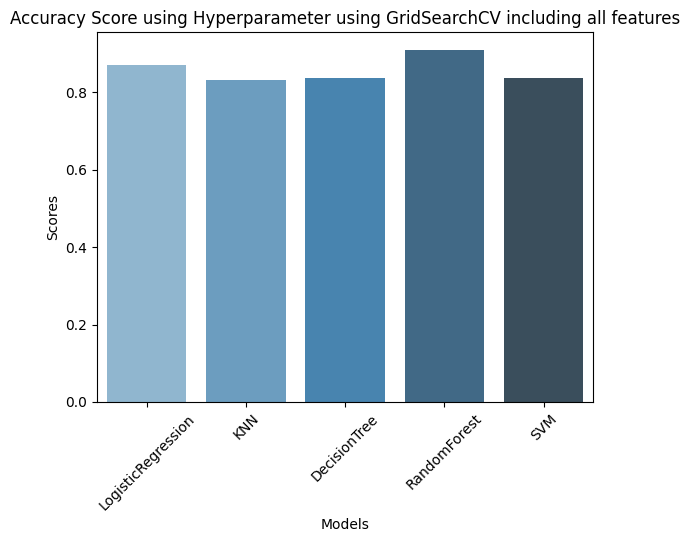

In [442]:
result_data = {'Models':['LogisticRegression','KNN','DecisionTree','RandomForest','SVM'],
              'Score':[0.87,0.831,0.837,0.91,0.837]}
sns.barplot(x=result_data['Models'],y=result_data['Score'],palette=("Blues_d"))
plt.title('Accuracy Score using Hyperparameter using GridSearchCV including all features')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation= 45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'DecisionTree'),
  Text(3, 0, 'RandomForest'),
  Text(4, 0, 'SVM')])

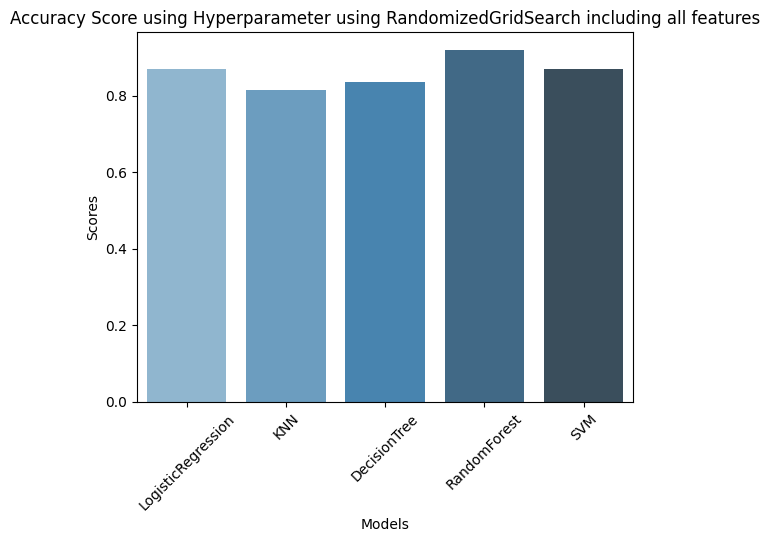

In [443]:
result_data = {'Models':['LogisticRegression','KNN','DecisionTree','RandomForest','SVM'],
              'Score':[0.87,0.814,0.837,0.92,0.87]}
sns.barplot(x=result_data['Models'],y=result_data['Score'],palette=("Blues_d"))
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Accuracy Score using Hyperparameter using RandomizedGridSearch including all features')
plt.xticks(rotation= 45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'DecisionTree'),
  Text(3, 0, 'RandomForest'),
  Text(4, 0, 'SVM')])

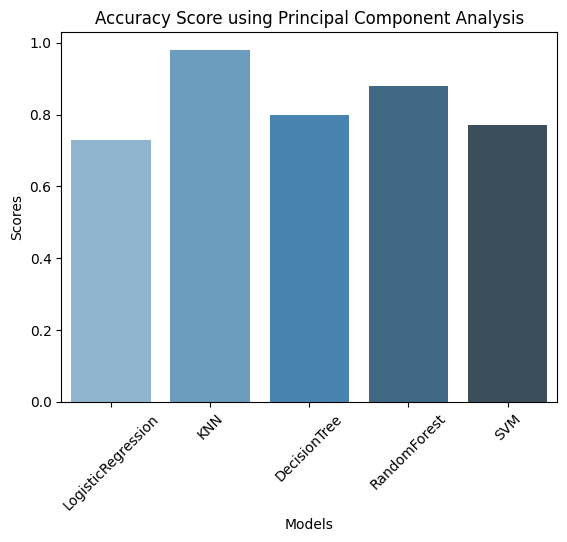

In [436]:
result_data = {'Models':['LogisticRegression','KNN','DecisionTree','RandomForest','SVM'],
              'Score':[0.73,0.98,0.80,0.88,0.77]}
sns.barplot(x=result_data['Models'],y=result_data['Score'],palette=("Blues_d"))
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Accuracy Score using Principal Component Analysis')
plt.xticks(rotation= 45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'DecisionTree'),
  Text(3, 0, 'RandomForest'),
  Text(4, 0, 'SVM')])

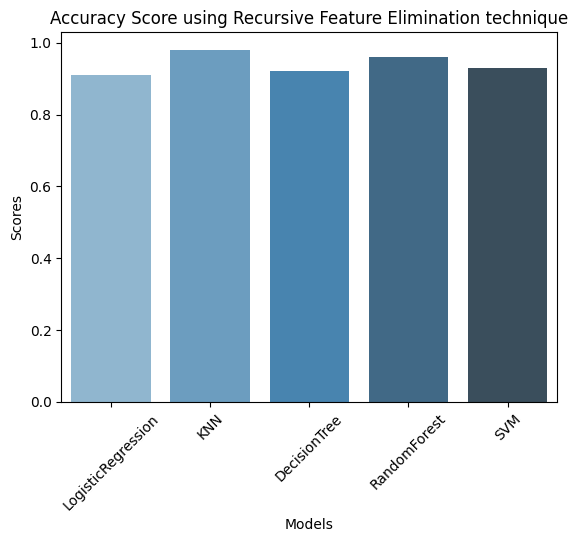

In [432]:
result_data = {'Models':['LogisticRegression','KNN','DecisionTree','RandomForest','SVM'],
              'Score':[0.91,0.98,0.92,0.96,0.93]}
sns.barplot(x=result_data['Models'],y=result_data['Score'],palette=("Blues_d"))
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Accuracy Score using Recursive Feature Elimination technique')
plt.xticks(rotation= 45)

# Conclusion

# Saving the model

In [519]:
principal_ca

array([[ 1.03522981e+01,  2.31067241e+00, -6.49158326e-01,
         8.97676675e+00, -4.20418148e+00, -1.65453770e+00],
       [ 2.23558001e+01,  2.05909720e+01, -3.56778500e-01,
         4.85708219e+00, -4.30688167e+00, -3.00687153e+00],
       [-1.99242297e+01,  2.39028622e+01,  2.70848809e+00,
        -1.13695207e+01, -4.15799280e+00,  5.92859948e-01],
       ...,
       [-1.78134408e+00, -1.29392873e+01,  8.75491896e-03,
        -3.92483508e-01,  1.98175799e-02, -3.39092616e+00],
       [ 3.78253777e+00,  4.81120900e-01,  7.56783020e+00,
        -2.84224584e+00, -2.84995664e+00, -4.30116206e+00],
       [ 3.13268657e+01, -5.91961515e+00,  1.00779370e+01,
        -2.78936232e+00, -1.46661187e+00,  1.64629189e+00]])

In [600]:
X_train,X_test,Y_train,Y_test = train_test_split(data_after_rfe,y_sm,random_state=42,test_size=.25)

In [622]:
# Taking model with RFE of KNN model which has predicted high accurracy using 10 features
import pickle
filename = 'KNN_Model.sav'
final_model_ = KNeighborsClassifier(weights='distance', n_neighbors= 7, metric= 'manhattan')
final_model_.fit(X_train,Y_train)
# y_final_predict = final_model_.predict(X_test)
# accuracy_score(Y_test,y_final_predict)

#saving the model
pickle.dump(final_model_, open(filename, 'wb'))

# A trained model 

In [551]:
Age = int(input("Please provide age:"))
DistanceFromHome = int(input("Please provide distance from the home:"))
EmpEnvironmentSatisfaction = int(input("Please provide EmpEnvironmentSatisfaction rate-(1,2,3,4):"))
EmpHourlyRate = int(input("Please provide EmpHourlyRate:"))
EmpJobInvolvement = int(input("Please provide EmpJobInvolvement:"))
EmpJobLevel = int(input("Please provide EmpJobLevel (1 to 18):"))
EmpJobSatisfaction = int(input("Please provide EmpJobSatisfaction:"))
TotalWorkExperienceInYears = int(input("Please provide TotalWorkExperienceInYears:"))
ExperienceYearsAtThisCompany = int(input("Please provide ExperienceYearsAtThisCompany:"))
YearsWithCurrManager = int(input("Please provide YearsWithCurrManager:"))


Please provide age:20
Please provide distance from the home:5
Please provide EmpEnvironmentSatisfaction rate-(1,2,3,4):4
Please provide EmpHourlyRate:82
Please provide EmpJobInvolvement:2
Please provide EmpJobLevel:12
Please provide EmpJobSatisfaction:4
Please provide TotalWorkExperienceInYears:5
Please provide ExperienceYearsAtThisCompany:2
Please provide YearsWithCurrManager:2


In [552]:
test_data = [[Age,DistanceFromHome,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,
                     EmpJobSatisfaction,TotalWorkExperienceInYears,ExperienceYearsAtThisCompany,YearsWithCurrManager]]

In [607]:
test_data

[[20, 5, 4, 82, 2, 12, 4, 5, 2, 2]]

In [618]:
#load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(test_data)
# print(result)

c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [619]:
result

array([3], dtype=int64)

In [620]:
if result==2:
    print("Permance Rating: 2")
elif result== 3:
    print("Permance Rating: 3")
else:
    print("Permance Rating: 4")

Permance Rating: 3


# Department wise performances

# Top 3 Important Factors effecting employee performance


# Recommendations to improve the employee performance based on insights from analysis.